# This is the processing pipeline for the looking at glioblastome differentation

## Initial setup:
Initial setup for our required packages and setting how verbose our errors should be.
During install, you may need to use ```pip``` rather thna ```pip3```, depends on how python is installed on your system (and what verions you have).

Also, we are suppressing some terminal output using ```grep``` (so the output looks a little cleaner).

In [7]:
!pip3 install numpy | grep -v 'already satisfied'
!pip3 install pandas | grep -v 'already satisfied'
!pip3 install seaborn | grep -v 'already satisfied'
!pip3 install scanpy | grep -v 'already satisfied'

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.2 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


## Reading Data In
We were only given filtered ```.h5``` files to work with (the unfiltered files seemed to be corrupted). 
This is not ideal as I do not know what steps were taken for this filtering but we will work with it to the best of out ability.

We have the option to do our analysis with only human genes, but we have deciced to include the rat endothelial cells as well.
When testing to see if it made a difference (see the bottom of the notebook), it seemed to be negligible either way.

We are going to mark the human and rat genomes so we can filter by them later in visualization.

If you are storing the data in a nested folder, just fill in ```file_location```.

In [89]:
# Aprrox. 1 sec per read
file_location = ''
data_1914 = '1914/1914_filtered.h5'
data_1914d = '1914d/1914d_filtered.h5'
data_1919 = '1919/1919_filtered.h5'
data_1919d = '1919d/1919d_filtered.h5'

# For remote server
# file_location = '../datasets/'
# data_1914 = 'data_1914/filtered_feature_bc_matrix.h5'
# data_1914d = 'data_1914d/filtered_feature_bc_matrix.h5'
# data_1919 = 'data_1919/filtered_feature_bc_matrix.h5'
# data_1919d = 'data_1919d/filtered_feature_bc_matrix.h5'



adata_1914_human = sc.read_10x_h5(
    file_location + data_1914,
    genome='GRCh38')
adata_1914d_human = sc.read_10x_h5(
    file_location + data_1914d,
    genome='GRCh38')
adata_1919_human = sc.read_10x_h5(
    file_location + data_1919,
    genome='GRCh38')
adata_1919d_human = sc.read_10x_h5(
    file_location + data_1919d,
    genome='GRCh38')

adata_1914_rat = sc.read_10x_h5(
    file_location + data_1914,
        genome='mRatBN7.2')
adata_1914d_rat = sc.read_10x_h5(
    file_location + data_1914d,
    genome='mRatBN7.2')
adata_1919_rat = sc.read_10x_h5(
    file_location + data_1919,
    genome='mRatBN7.2')
adata_1919d_rat = sc.read_10x_h5(
    file_location + data_1919d,
    genome='mRatBN7.2')




reading 1914/1914_filtered.h5
 (0:00:00)
reading 1914d/1914d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)
reading 1919/1919_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919d/1919d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1914/1914_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1914d/1914d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919/1919_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919d/1919d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Checking Names
It is common for data to be prepended with labels. This is often a product of off the shelf software and can make things harder to work with if you don't remove them. 

We are just going to quickly check and remove if neccesarry.

In [90]:
# View the first 5 rows of the data
adata_1914_human.var.head()
adata_1914_human.obs.head()



Empty DataFrame
Columns: []
Index: [AAACCCAAGACATCCT-1, AAACCCAAGCATGAAT-1, AAACCCAAGCTAGATA-1, AAACCCAAGTCCTGCG-1, AAACCCACAAAGGAGA-1]

### Result:
We see that everything is either prepended by ```GRCh38____``` or ```mRatBN7.2_```. 
Thankfully, it seems that whoever did the previous analysis made sure these prepended labels were always ten charecters by adding underscores, so we can just strip the first ten charecters off all the gene_ids.

## Cleaning Up, Step 1
The first thing we are going to do is strip the first ten charecters from all the gene_ids. 

Then we are going to ensure that all the gene_ids are unique in the respective datasets.

In [91]:
# filter the GRCh38__ from the front of names
adata_1914_human.var_names = [name[10:] for name in adata_1914_human.var_names]
adata_1914d_human.var_names = [name[10:] for name in adata_1914d_human.var_names]
adata_1919_human.var_names = [name[10:] for name in adata_1919_human.var_names]
adata_1919d_human.var_names = [name[10:] for name in adata_1919d_human.var_names]
adata_1914_rat.var_names = [name[10:] for name in adata_1914_rat.var_names]
adata_1914d_rat.var_names = [name[10:] for name in adata_1914d_rat.var_names]
adata_1919_rat.var_names = [name[10:] for name in adata_1919_rat.var_names]
adata_1919d_rat.var_names = [name[10:] for name in adata_1919d_rat.var_names]


# make the gene names unique
adata_1914_human.var_names_make_unique()
adata_1914d_human.var_names_make_unique()
adata_1919_human.var_names_make_unique()
adata_1919d_human.var_names_make_unique()
adata_1914_rat.var_names_make_unique()
adata_1914d_rat.var_names_make_unique()
adata_1919_rat.var_names_make_unique()
adata_1919d_rat.var_names_make_unique()



## Combine
We will combine rat and human, while preserving some annotation so we can filter by them later. 

We also want to combine 1914 and 1914d (same with 1919) to compare them. 

Finally, we want to combine 1914 with 1919 to form a single dataset. This means we will have to be extra careful with our normalization steps.

In [92]:
# Quick Check:
adata_1914_human.obs.head()

Empty DataFrame
Columns: []
Index: [AAACCCAAGACATCCT-1, AAACCCAAGCATGAAT-1, AAACCCAAGCTAGATA-1, AAACCCAAGTCCTGCG-1, AAACCCACAAAGGAGA-1]

In [93]:
adata_human_combined = adata_1914_human.concatenate(adata_1914d_human, adata_1919_human, adata_1919d_human, batch_categories=['1914_human', '1914d_human', '1919_human', '1919d_human'], join='outer')
adata_total_combined = adata_1914_human.concatenate(adata_1914_rat, adata_1914d_human, adata_1914d_rat, adata_1919_human, adata_1919_rat, adata_1919d_human, adata_1919d_rat, batch_categories=['1914_human', '1914_rat', '1914d_human', '1914d_rat', '1919_human', '1919_rat', '1919d_human', '1919d_rat'], join='outer')

adata_human_combined.obs.batch.value_counts()
adata_total_combined.obs.batch.value_counts()


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next 

1914_human     9513
1914_rat       9513
1914d_human    8925
1914d_rat      8925
1919_human     7610
1919_rat       7610
1919d_human    7278
1919d_rat      7278
Name: batch, dtype: int64

### Results Files
It has become standard practice to use ```.h5ad``` files to group all our results and steps together in a single file.

I personally do not like this, but this is standard practice in the field.

Make sure to uncomment anything you want here, and in the previous code blocks.

Afterwards simply choose what you want to run it on by including it in the ```running_on``` array, and where you want to save it in the ```saving_to``` array.

In [94]:
rf_total_combined = 'write/total_combined_final.h5ad'
rf_human_combined = 'write/human_combined_final.h5ad'

running_on = [adata_human_combined, adata_total_combined]
saving_to = [rf_human_combined, rf_total_combined]

In [95]:
# We want to quickly write everything to our results files:
def write_results(running_on, saving_to):
    for i in range(len(running_on)):
        running_on[i].write(saving_to[i])
        print('Wrote to ' + saving_to[i])

In [96]:
write_results(running_on, saving_to)

Wrote to write/human_combined_final.h5ad
Wrote to write/total_combined_final.h5ad


## Filtering
Since, we don't know how things were filitered to begin with, we are just going to do some basic filtering:
1) Filter any cells that have less than 200 genes expressed.
2) Filter any genes that are expressed in less than 2 cells.
3) Annotating any known mitochondrial genes, as they introduce unncessary noise.
4) Filter out any cells with more than 2500 genes.
5) Filter out any cells of which more than 5% of their genes are mitochondrial.

We are also computing QC metrics that we will use throughout. These include:
1) total_genes_by_count: single number for how many genes are present in a cell.
2) n_genes_by_count: single number for the number of genes with at least 1 count in a cell.
3) total_counts: a single number for the total amount of counts expressed by every gene in a cell.
4) pct_counts_mt: The proportion of total counts for a cell which are from mitochondrial genes.

There are others, but are not important for now...


In [97]:

# filter cells with less than 200 genes expressed
def filter_200(running_on):
    for item in running_on:
        sc.pp.filter_cells(item, min_genes=200)
    
# filter genes expressed in less than 2 cells
def filter_2(running_on):
    for item in running_on:
        sc.pp.filter_genes(item, min_cells=2)
        

In [98]:
# Aprrox. 2.5 sec per group
filter_200(running_on)

filtered out 8726 cells that have less than 200 genes expressed
filtered out 41529 cells that have less than 200 genes expressed


In [99]:
# Aprrox. 0.5 sec per group
filter_2(running_on)

filtered out 19469 genes that are detected in less than 2 cells
filtered out 34764 genes that are detected in less than 2 cells


In [100]:

# annotate the group of mitochondrial genes as 'mt'
def annotate_mt(running_on):
    for item in running_on:
        item.var['mt'] = item.var_names.str.startswith('MT-')
# compute QC metrics for all datasets
def qc_metrics(running_on):
    for item in running_on:
        sc.pp.calculate_qc_metrics(item, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    

In [101]:

# Aprrox. 0.5 sec per group
annotate_mt(running_on)


In [102]:
# Aprrox. 0.5 sec per group
qc_metrics(running_on)

In [103]:

# filter cells with more than 2500 genes
def filter_2500(running_on):
    for item in running_on:
        item = item[item.obs.n_genes_by_counts < 2500, :]

# filter cells with more than 5% mitochondrial genes
def filter_5_mt(running_on):
    for item in running_on:
        item = item[item.obs.pct_counts_mt < 5, :]


In [24]:
# Aprrox. 0.5 sec per group
# filter_2500(running_on)

In [104]:
# Aprrox. 0.5 sec per group
filter_5_mt(running_on)

## Checking QC Metrics
We are just going to do some quick visualization for QC metrics.

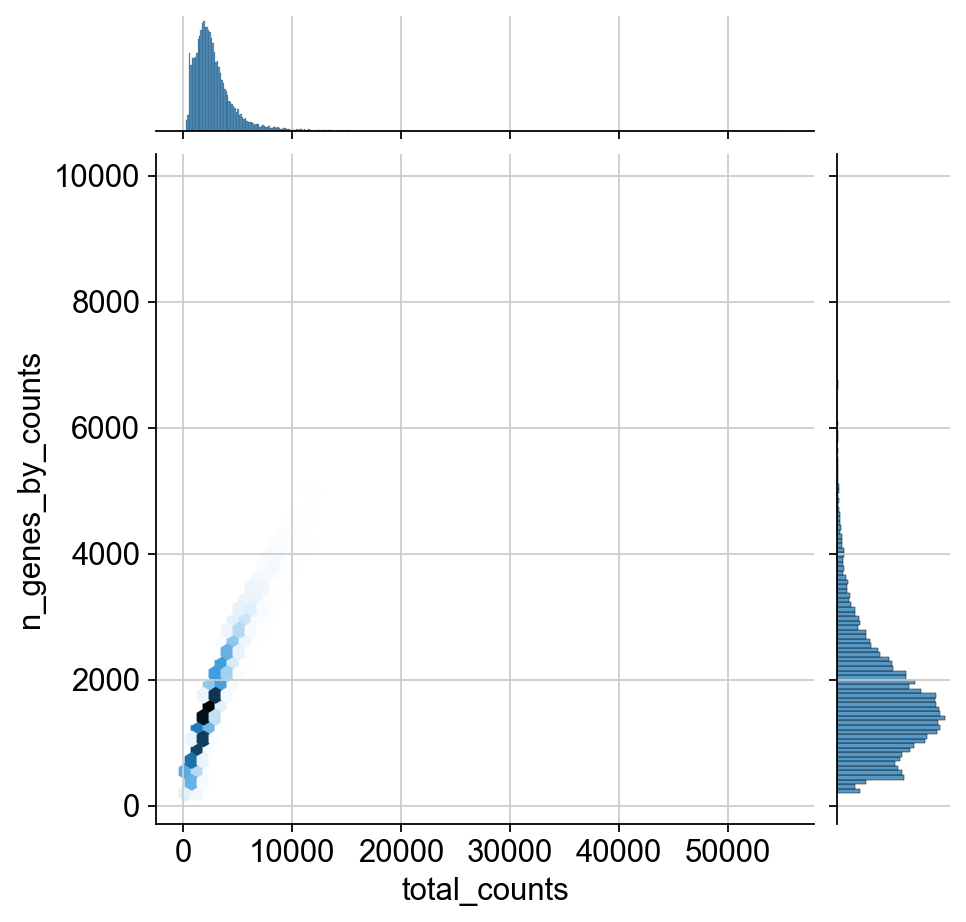

In [105]:

plot1 = sns.jointplot(
        data=adata_total_combined.obs,
        x="total_counts",
        y="n_genes_by_counts",
        kind="hex",
    )



<AxesSubplot: xlabel='pct_counts_mt', ylabel='Count'>

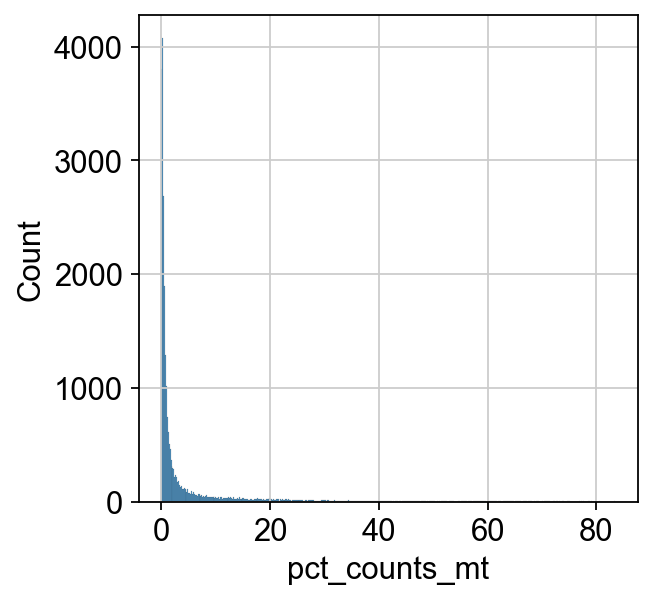

In [106]:
sns.histplot(adata_total_combined.obs["pct_counts_mt"])


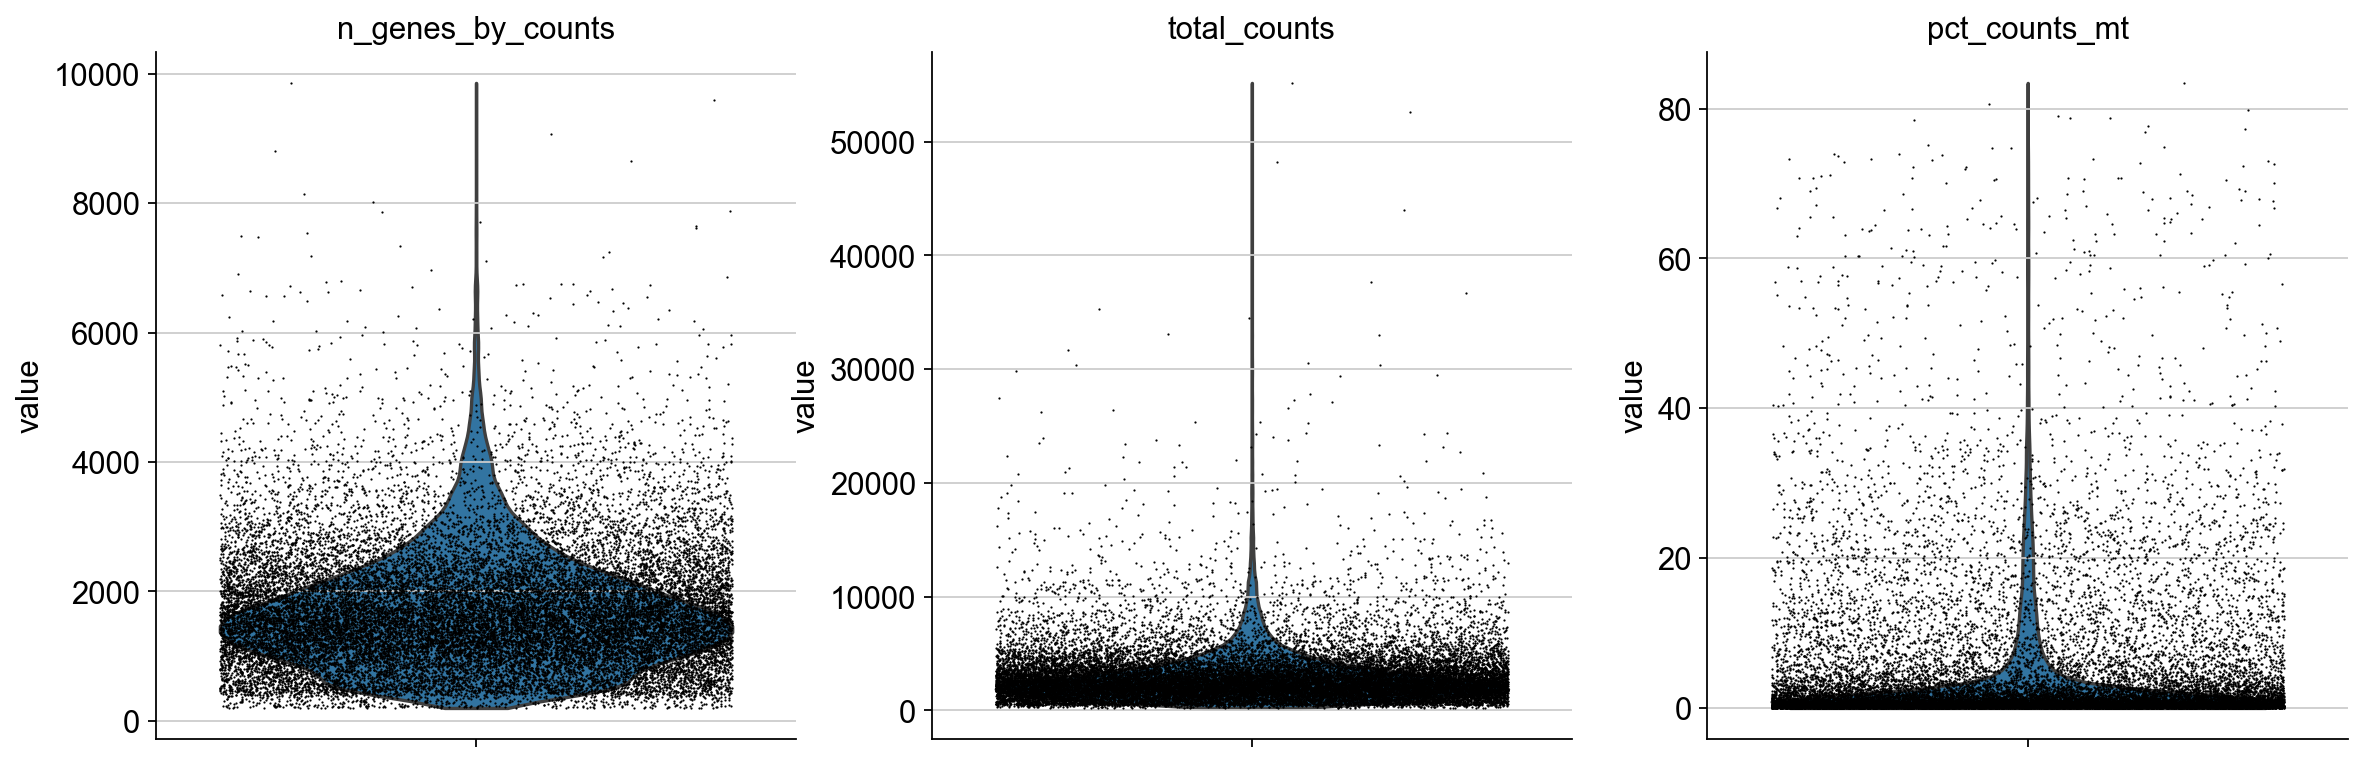

In [107]:
sc.pl.violin(adata_total_combined, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                jitter=0.4, multi_panel=True)

## Normalization
It is important to normalize our data. Since we are combining different datasets and have done some filtering, we want to make sure that no genes or cells are over represented. Therefore we going to normalize on a per cell basis by essentially dividing all gene counts by the total count data for every cell. 

We will also put them on a log basis to make visualization easier. Just note this for future visualizations.

In [108]:
# Normalize the data
def normalize_data(running_on):
    for item in running_on:
        sc.pp.normalize_total(item, target_sum=1e4)

# Putting on a log scale
def log1p(running_on):
    for item in running_on:
        sc.pp.log1p(item)



In [109]:
# Aprrox. 0.5 sec per group
normalize_data(running_on)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [110]:
# Aprrox. 0.5 sec per group
log1p(running_on)

## Filtering Again
We are going to filter to only our highly variable genes. We are going to save a copy of our inclusive filtered data later under 'raw'.

In [111]:

# Find variable genes to do anaylsis on
sc.pp.highly_variable_genes(adata_human_combined, min_mean=0.0125, min_disp=0.5, batch_key='batch')
sc.pp.highly_variable_genes(adata_total_combined, min_mean=0.0125, min_disp=0.5, batch_key='batch')



extracting highly variable genes


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.

    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


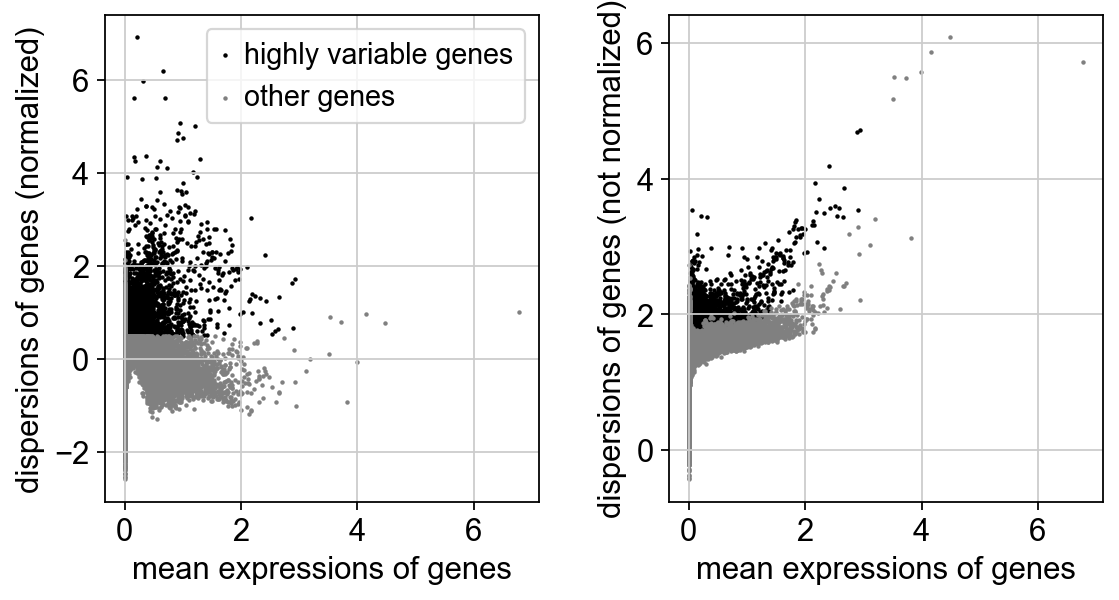

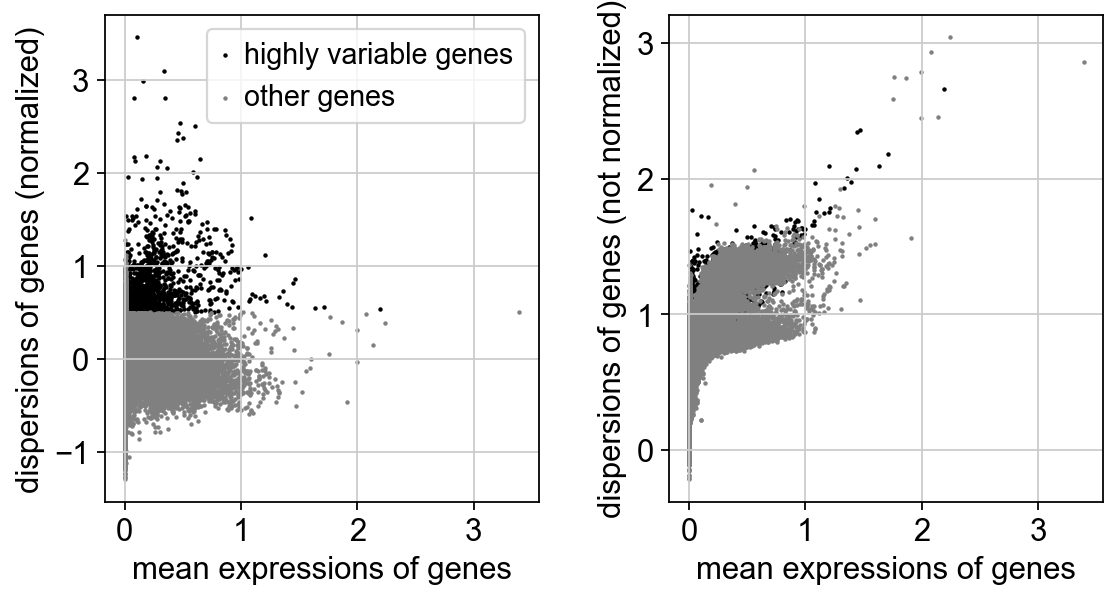

In [112]:
# quick visualisation of the highly variable genes
sc.pl.highly_variable_genes(adata_human_combined)
sc.pl.highly_variable_genes(adata_total_combined)



In [113]:
def save_raw(running_on):
    for item in running_on:
        item.raw = item

# Aprrox. 0.1 sec per group
save_raw(running_on)




In [114]:
def filter_highly_variable(running_on):
    for item in running_on:
        item = item[:, item.var.highly_variable]

# Aprrox. 0.5 sec per group
filter_highly_variable(running_on)

## Regressing out Variation
We are also going to regress out any (hopefully) unwanted sources of variation. This should be pretty safe, but we may want to check out what things look like without that.

### Note:
This can take up to 10+ minutes, so avoid rerunning when you don't need to.


In [115]:
def regress_out(running_on):
    for item in running_on:
        sc.pp.regress_out(item, ['total_counts', 'pct_counts_mt'], n_jobs=4)
        
# Aprrox. 2 minutes per group
regress_out(running_on)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


KeyboardInterrupt: 

In [116]:
# Optionally we can also scale the data, making sure everything is below max

def scale_data(running_on, max=10):
    for item in running_on:
        sc.pp.scale(item, max_value=max)

# Aprrox. 1 sec per group
scale_data(running_on)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


## Analayis
A classic tool to visualizing our data is PCA Analysis. This can take up to 1 minute per sample.

In [117]:
def do_pca(running_on):
    for item in running_on:
        sc.tl.pca(item, svd_solver='arpack')

# Aprrox. 40 sec per group
do_pca(running_on)



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:44)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:20)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


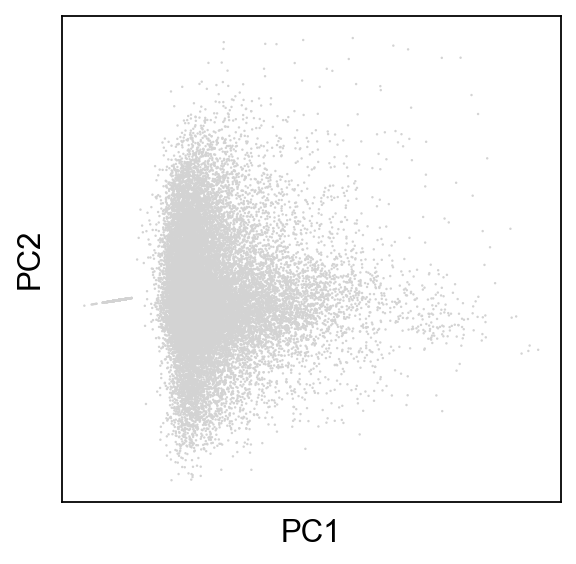

In [118]:
# plotting pca, we should use color...
sc.pl.pca(adata_total_combined)


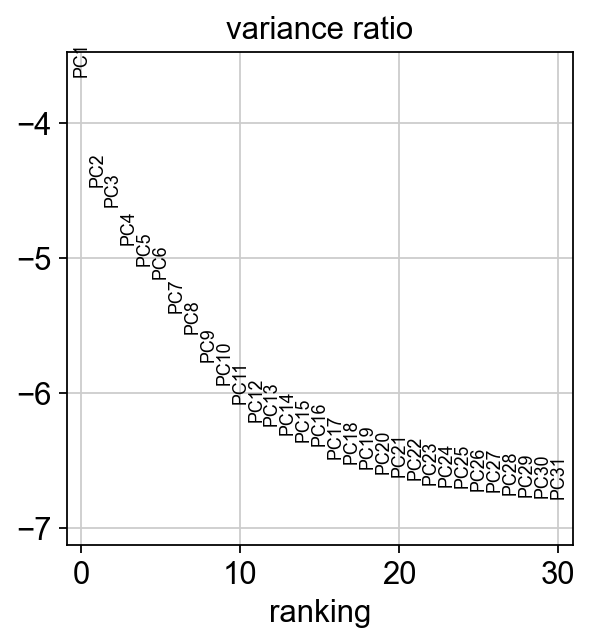

In [119]:
# Taking a look at how impactful each principal component is
sc.pl.pca_variance_ratio(adata_total_combined, log=True)

In [120]:
write_results(running_on, saving_to) 

Wrote to write/human_combined_final.h5ad
Wrote to write/total_combined_final.h5ad


## Nearest Neighbour
This is one of the most important steps of single cell analysis, nearest neighbour analysis.

In [121]:
def do_nearest_neighbour(running_on):
    for item in running_on:
        sc.pp.neighbors(item, n_neighbors=25, n_pcs=40)

# Aprrox. 10 sec per group
do_nearest_neighbour(running_on)



computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


## Subgrouping
We are going to use the leiden algorithim to group into subgroups.

In [122]:
!pip3 install leidenalg | grep -v 'Requirement already satisfied'
!pip3 install louvain

In [123]:
def do_leiden(running_on):
    for item in running_on:
        sc.tl.leiden(item)

# Aprrox. 5 sec per group
do_leiden(running_on)

running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


In [124]:
def do_louvain(running_on):
    for item in running_on:
        sc.tl.louvain(item)

In [125]:
do_louvain(running_on)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:03)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:04)


## Manifold Construction
There are a number of methods to do manifold construction, there are three below: tSNE, UMAP, and PAGA (for QC).

In [126]:
plot = False

def do_paga(running_on):
    for item in running_on:
        sc.tl.paga(item)
        sc.pl.paga(item, plot=plot)

# Aprrox. 0.5 sec per group
do_paga(running_on)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


## UMAP or tSNE
I prefer UMAP as it preserves data better, but tSNE results in better graphics as it throws away data that is usually noise.

In [127]:

def do_umap(running_on):
    for item in running_on:
      sc.tl.umap(item)
    
# Aprrox. 15 sec per group
do_umap(running_on)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


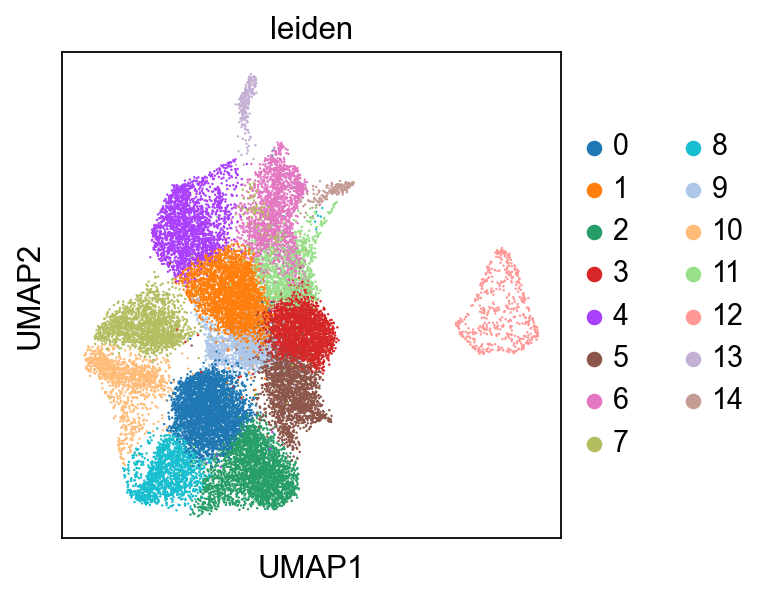

In [128]:
use_raw = False
color = ['leiden']
sc.pl.umap(adata_total_combined, color=color, use_raw=use_raw)

In [49]:
def do_tsne(running_on):
    for item in running_on:
        sc.tl.tsne(item)
        

# Aprrox. 1.5 minutes per group
do_tsne(running_on)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:36)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:48)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


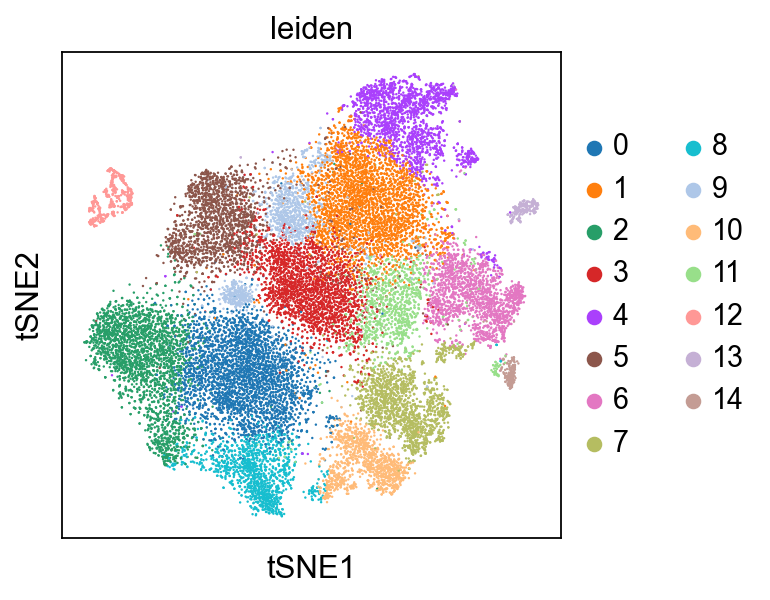

In [79]:
use_raw = True
color = ['leiden']

# plotting tsne
sc.pl.tsne(adata_total_combined, color=color, use_raw=use_raw)

In [51]:
write_results(running_on, saving_to)

Wrote to write/human_combined_final.h5ad
Wrote to write/total_combined_final.h5ad


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


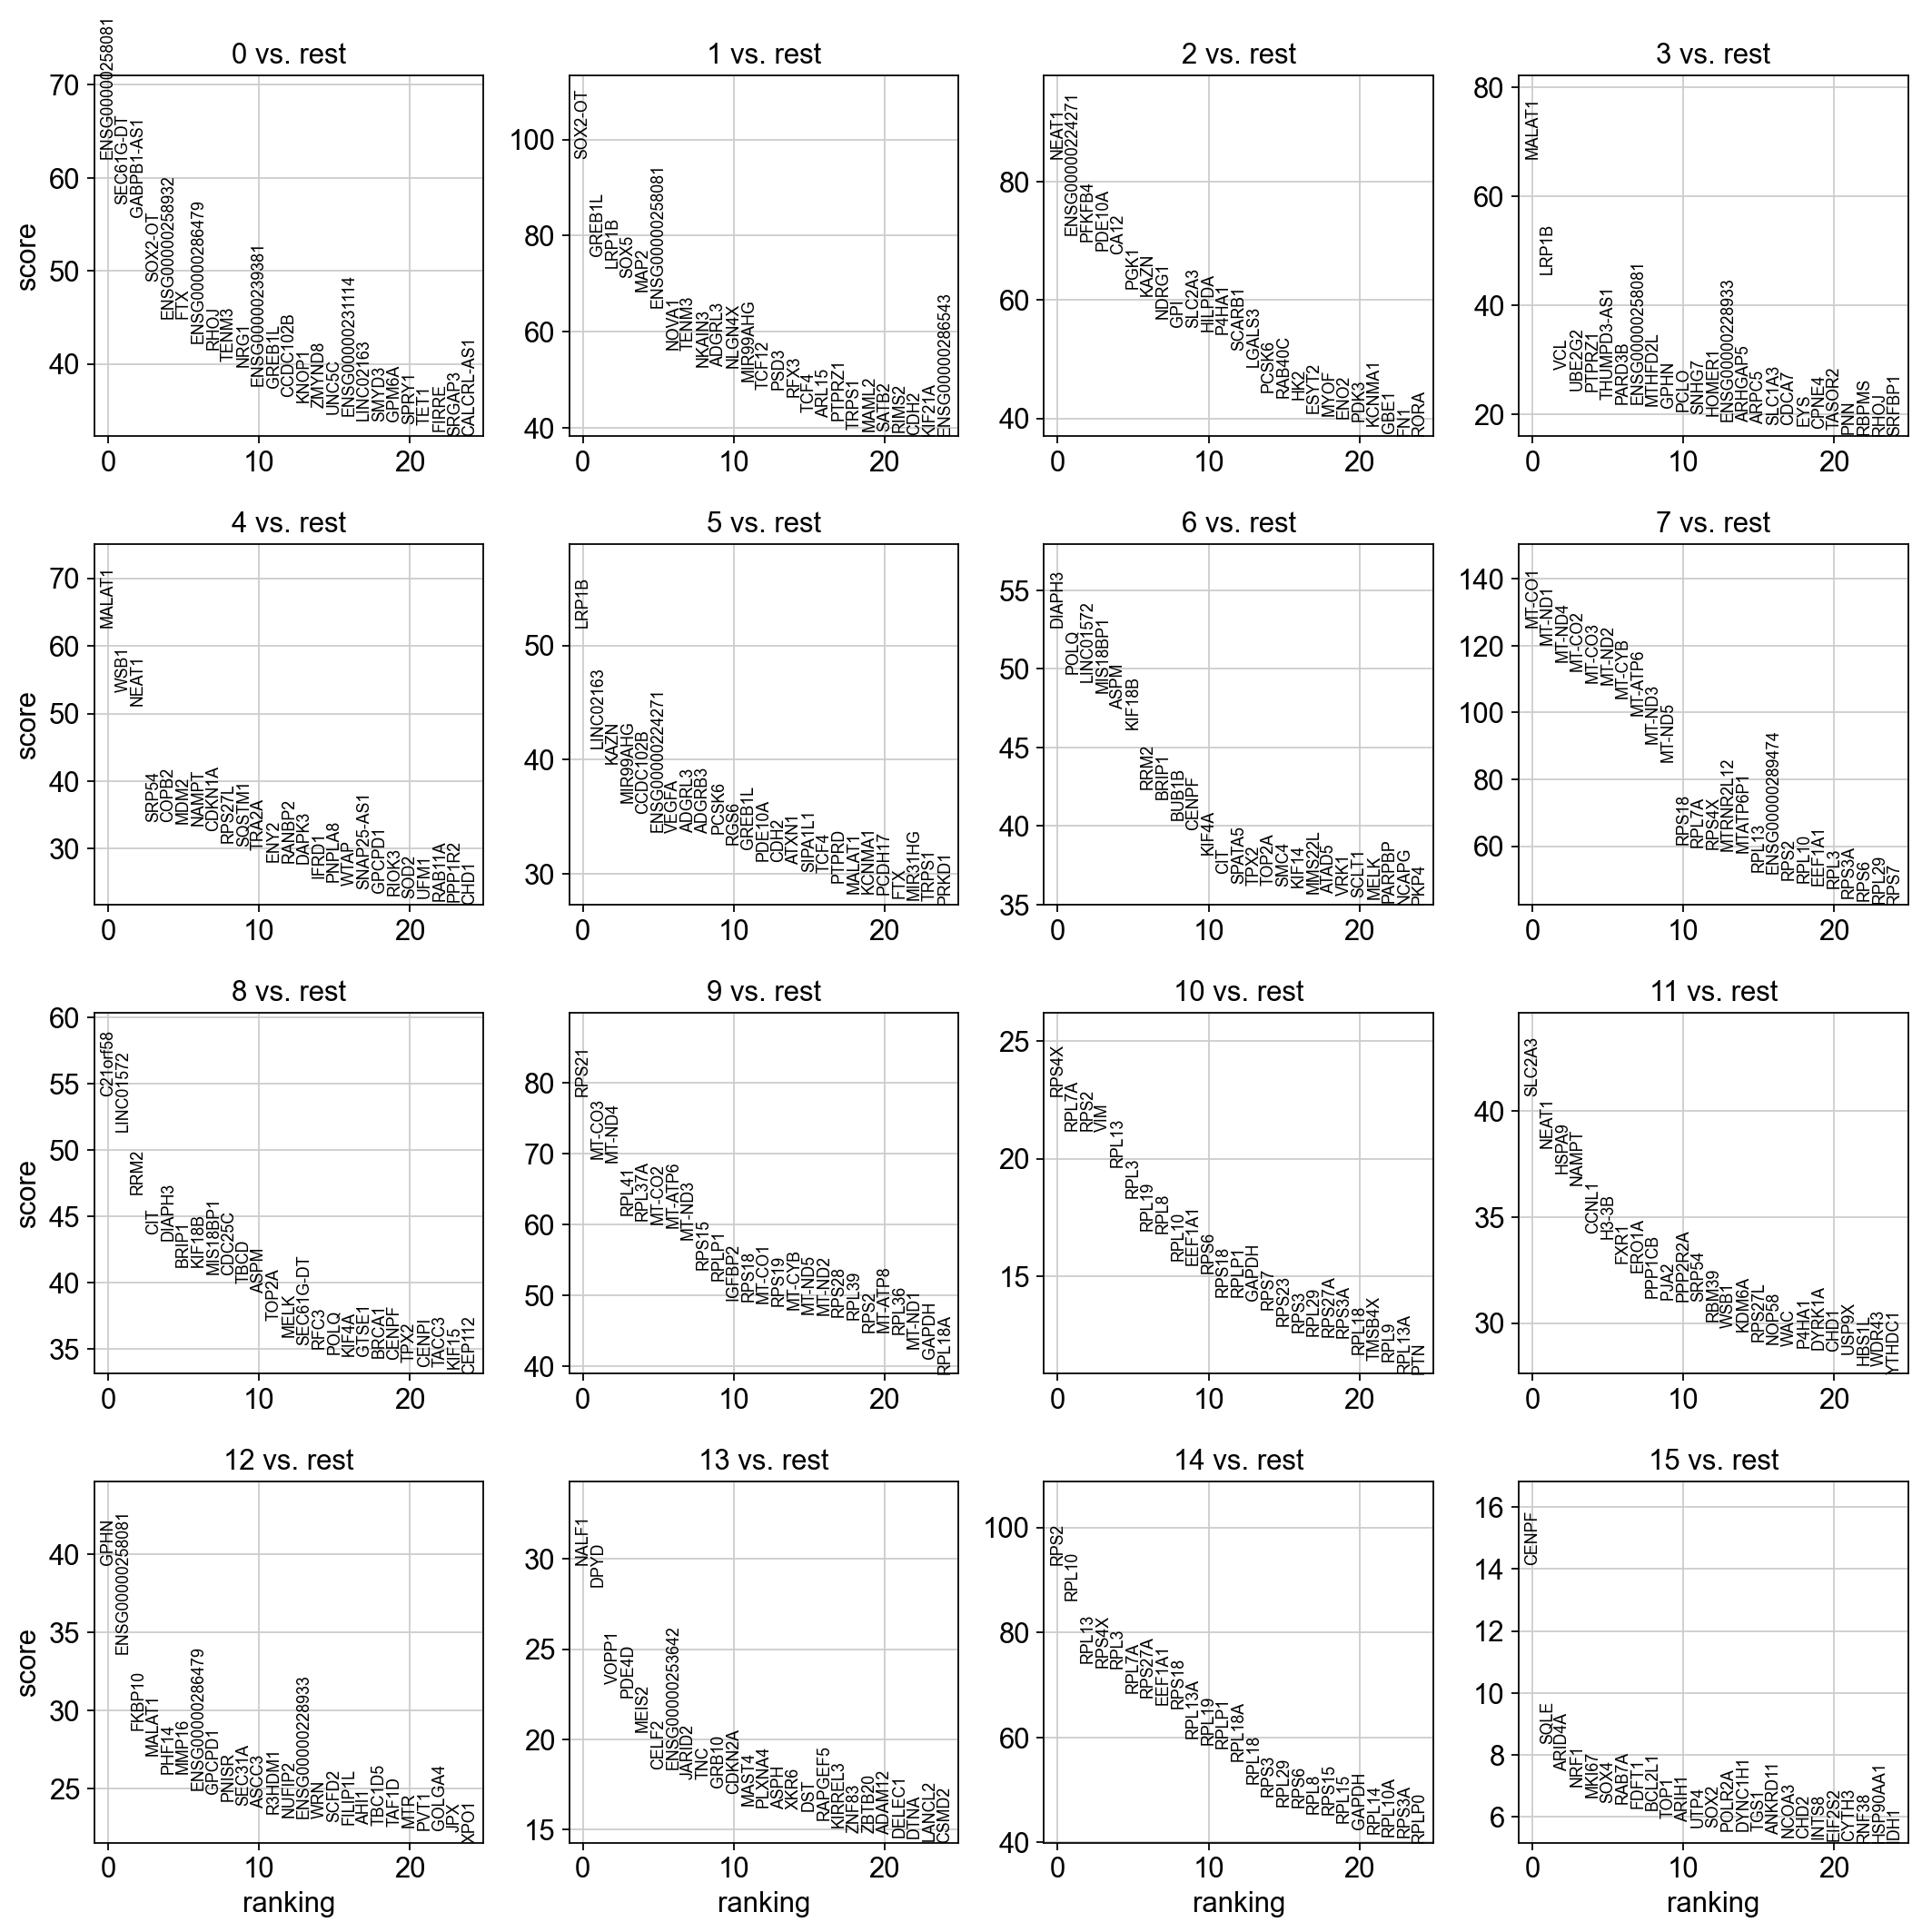

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


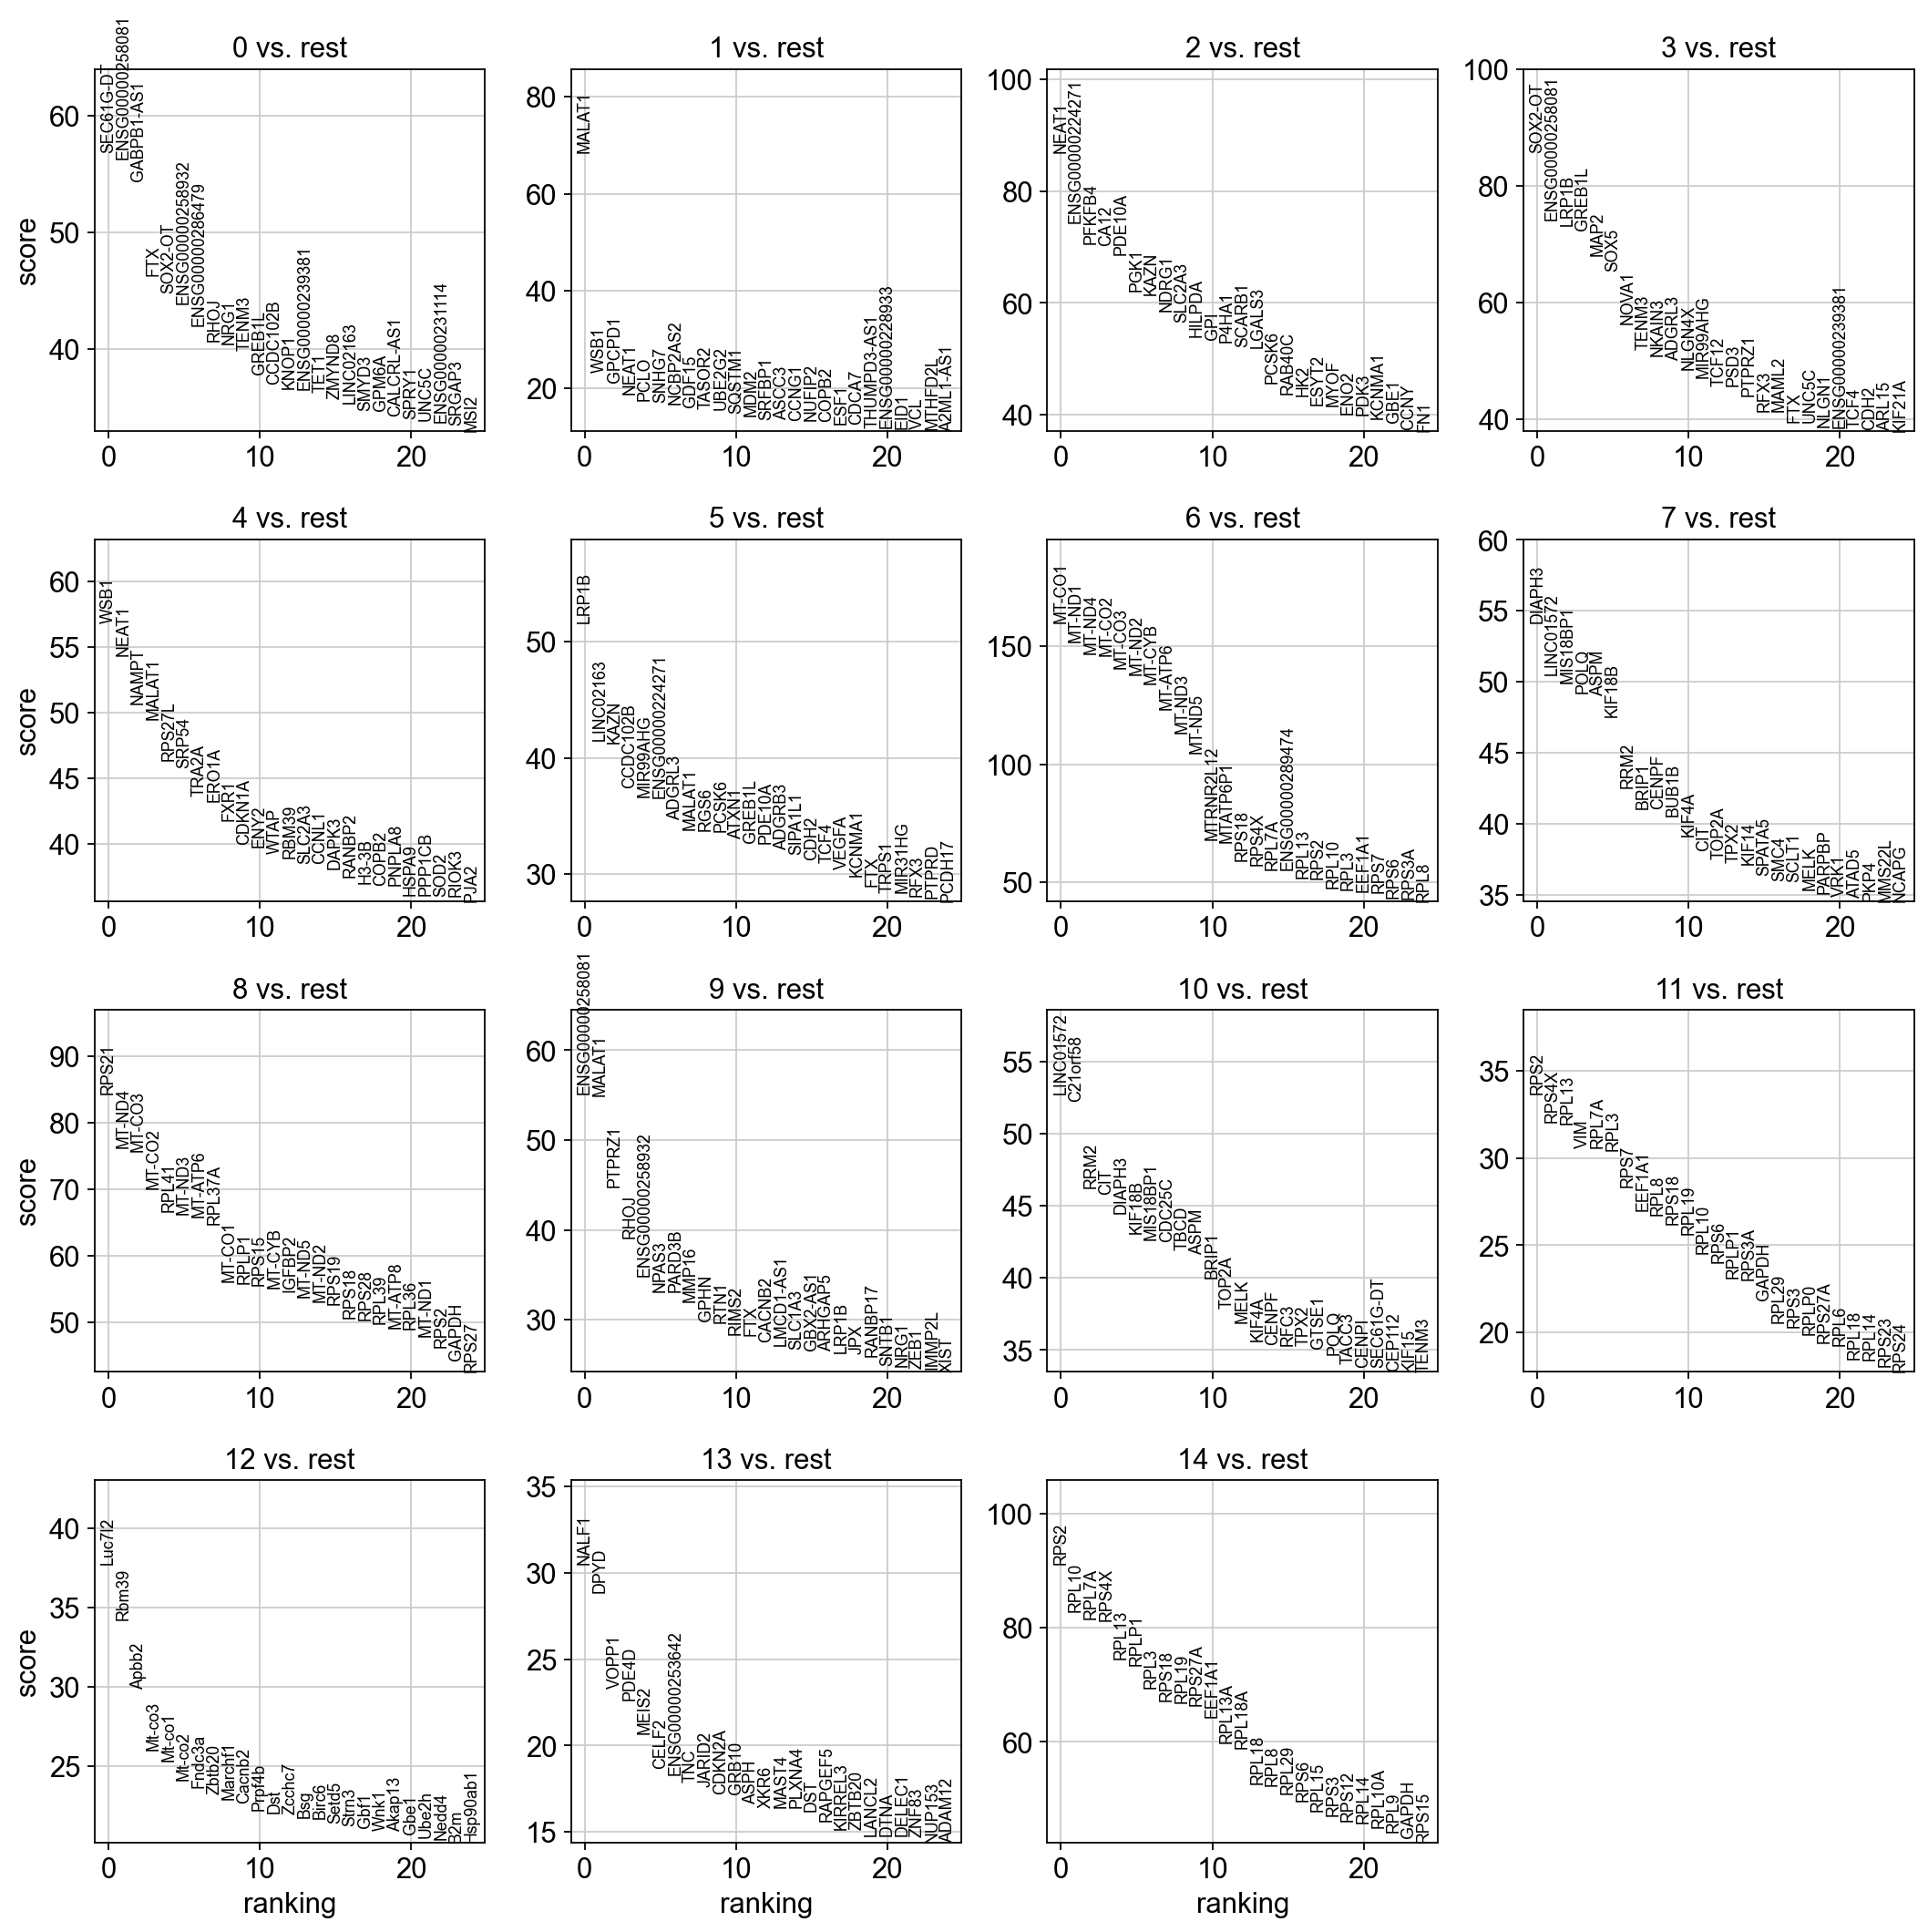

In [52]:
number_of_genes = 25
method = "t-test" # an alternative to try is wilconxon

def rank_gene_groups(running_on):
    for item in running_on:
        sc.tl.rank_genes_groups(item, 'leiden', method=method)
        sc.pl.rank_genes_groups(item, n_genes=number_of_genes, sharey=False, pts=True)

# Aprrox. 10 sec per group
rank_gene_groups(running_on)

## Ingesting Reference

In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

# path for local storage
path = "/Volumes/Extreme_SSD/snRNA/"

# path for remote storage:
# path = "data/"

# for each folder in path make an adata object with a unique name with read_10x_mtx
folders = os.listdir(path)

data=[]
for folder in folders:
    adata = sc.read_10x_mtx(path+folder, var_names='gene_symbols', cache=True, prefix=folder+'_')
    data.append([folder,
                  adata])

In [329]:
## Shortcut to load data
adata_us_combined = sc.read_h5ad('write/human_combined_final.h5ad')
adata_total_combined = sc.read_h5ad('write/total_combined_final.h5ad')


In [330]:
adata_total_combined.obs['sample_type'] = adata_total_combined.obs.index.str.split('-1-').str[1]
adata_total_combined.obs


batch  n_genes  n_genes_by_counts  \
AAACCCACAAAGGAGA-1-1914_human  1914_human     2338               2338   
AAACCCAGTTGTCCCT-1-1914_human  1914_human     4193               4192   
AAACGAAAGCTCATAC-1-1914_human  1914_human     3384               3384   
AAACGAAGTGTCCAAT-1-1914_human  1914_human      878                878   
AAACGCTAGTAGTGCG-1-1914_human  1914_human     1793               1793   
...                                   ...      ...                ...   
TTGCGTCCAGGAGGAG-1-1919d_rat    1919d_rat      710                705   
TTGTTGTAGTGGACGT-1-1919d_rat    1919d_rat      302                302   
TTTCAGTGTCAGTCCG-1-1919d_rat    1919d_rat      798                792   
TTTCCTCAGAGTTCGG-1-1919d_rat    1919d_rat      466                462   
TTTGGTTCACGAGAAC-1-1919d_rat    1919d_rat      561                559   

                               total_counts  total_counts_mt  pct_counts_mt  \
AAACCCACAAAGGAGA-1-1914_human        4497.0             44.0       0.978430   
AAACCCAGTTGTCCCT-1-1914_human        9235.0              2.0       0.021657   
AAACGAAAGCTCATAC-1-1914_human        7311.0              5.0       0.068390   
AAACGAAGTGTCCAAT-1-1914_human        1131.0              1.0       0.088417   
AAACGCTAGTAGTGCG-1-1914_human        3368.0              3.0       0.089074   
...                                     ...              ...            ...   
TTGCGTCCAGGAGGAG-1-1919d_rat          900.0              0.0       0.000000   
TTGTTGTAGTGGACGT-1-1919d_rat          337.0              0.0       0.000000   
TTTCAGTGTCAGTCCG-1-1919d_rat          912.0              0.0       0.000000   
TTTCCTCAGAGTTCGG-1-1919d_rat          535.0              0.0       0.000000   
TTTGGTTCACGAGAAC-1-1919d_rat          647.0              0.0       0.000000   

                              sample_type  
AAACCCACAAAGGAGA-1-1914_human  1914_human  
AAACCCAGTTGTCCCT-1-1914_human  1914_human  
AAACGAAAGCTCATAC-1-1914_human  1914_human  
AAACGAAGTGTCCAAT-1-1914_human  1914_human  
AAACGCTAGTAGTGCG-1-1914_human  1914_human  
...                                   ...  
TTGCGTCCAGGAGGAG-1-1919d_rat    1919d_rat  
TTGTTGTAGTGGACGT-1-1919d_rat    1919d_rat  
TTTCAGTGTCAGTCCG-1-1919d_rat    1919d_rat  
TTTCCTCAGAGTTCGG-1-1919d_rat    1919d_rat  
TTTGGTTCACGAGAAC-1-1919d_rat    1919d_rat  

[25123 rows x 7 columns]

In [55]:
# how many leiden clusters are there?
adata_total_combined.obs['louvain'].value_counts()

0     3763
1     3285
2     3102
3     2827
4     2520
5     1950
6     1921
7     1398
8     1367
9     1163
10    1073
11     523
12     231
Name: louvain, dtype: int64

## Annotating Reference Data

In [56]:
cell_types = pd.read_csv('SF1/GSE138794_snRNA_Seq_cell_types.txt', sep=' ', header=None, index_col=0)
sample_identifiers = [
    "SF10022",
    "SF10127",
    "SF11979",
    "SF12090",
    "SF12264",
    "SF4400",
    "SF4297",
    "SF6996",
    "SF9259R",
    "SF9259S"
]

data2=[]
cell_t = cell_types

for identifier in sample_identifiers:
    # get the adata object in data where sample identifier is in the name of the adata object [0]
    adata = [x for x in data if identifier in x[0]][0][1]
    print(adata)
    cell_t = cell_types
    print(identifier)
    # remove all cell types that don't begin with the sample identifier
    print(cell_types.index.str.startswith(identifier).sum())

    cell_t = cell_t[cell_t.index.str.startswith(identifier)]
    # print(cell_t)
    # remove the sample identifier from the cell type
    cell_t.index = cell_t.index.str.replace(identifier + '_', '')
    # add the cell types to the adata object
    # print(cell_t)
    print(len(cell_t), len(adata))

    # # add the cell types to the adata[i].obs dataframe where index matches obs
    try:
        adata.obs['cell_type'] = cell_t.loc[adata.obs.index, 1]
        # print(adata.obs)
        data2.append([identifier, adata])
    except:
        print('error')
        pass

AnnData object with n_obs × n_vars = 2888 × 33694
    var: 'gene_ids', 'feature_types'
SF10022
2888
2888 2888
AnnData object with n_obs × n_vars = 975 × 33694
    var: 'gene_ids', 'feature_types'
SF10127
975
975 975
AnnData object with n_obs × n_vars = 693 × 33694
    var: 'gene_ids', 'feature_types'
SF11979
693
693 693
error
AnnData object with n_obs × n_vars = 107 × 33694
    var: 'gene_ids', 'feature_types'
SF12090
107
107 107
AnnData object with n_obs × n_vars = 2324 × 33694
    var: 'gene_ids', 'feature_types'
SF12264
2324
2324 2324
AnnData object with n_obs × n_vars = 489 × 33694
    var: 'gene_ids', 'feature_types'
SF4400
489
489 489
AnnData object with n_obs × n_vars = 3901 × 33694
    var: 'gene_ids', 'feature_types'
SF4297
3901
3901 3901
AnnData object with n_obs × n_vars = 2669 × 33694
    var: 'gene_ids', 'feature_types'
SF6996
2669
2669 2669
AnnData object with n_obs × n_vars = 1422 × 33694
    var: 'gene_ids', 'feature_types'
SF9259R
1422
1422 1422
AnnData object with n_o

In [57]:
adata_ref_combined = sc.AnnData.concatenate(*[x[1] for x in data2], batch_categories=[x[0] for x in data2])

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next 

In [58]:
sc.pp.pca(adata_ref_combined)
sc.pp.neighbors(adata_ref_combined)
sc.tl.umap(adata_ref_combined)
sc.tl.louvain(adata_ref_combined, resolution=0.5)
adata_ref_combined.write('write/ref_snseq_raw.h5ad')

computing PCA
    with n_comps=50
    finished (0:00:54)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


In [278]:
adata_ref_combined.obs

cell_type batch  \
AAACCCAAGAAGGTAG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAAGACCTCCG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCACAACTTGGT-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAGTCTACGAT-1-SF10022-ref                     Oligodendrocyte   ref   
AAACCCAGTTATCTTC-1-SF10022-ref         Neoplastic_cell/mesenchymal   ref   
...                                                            ...   ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new                          NaN   new   

                                      louvain     sample_type clusters  \
AAACCCAAGAAGGTAG-1-SF10022-ref              1             NaN      NaN   
AAACCCAAGACCTCCG-1-SF10022-ref              1             NaN      NaN   
AAACCCACAACTTGGT-1-SF10022-ref              1             NaN      NaN   
AAACCCAGTCTACGAT-1-SF10022-ref              2             NaN      NaN   
AAACCCAGTTATCTTC-1-SF10022-ref              1             NaN      NaN   
...                                       ...             ...      ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new       0  1919d_rat-1919       35   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new       0  1919d_rat-1919       16   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new       0  1919d_rat-1919       18   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new       0  1919d_rat-1919       24   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new       0  1919d_rat-1919       24   

                                                    cell_type_2  \
AAACCCAAGAAGGTAG-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCAAGACCTCCG-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCACAACTTGGT-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCAGTCTACGAT-1-SF10022-ref             Oligodendyrocye-like   
AAACCCAGTTATCTTC-1-SF10022-ref         Stem Cells (Mesenchymal)   
...                                                         ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new               Endothelial   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new               Endothelial   

                                           cell_type_3  size  
AAACCCAAGAAGGTAG-1-SF10022-ref                     NaN     5  
AAACCCAAGACCTCCG-1-SF10022-ref                     NaN     5  
AAACCCACAACTTGGT-1-SF10022-ref                     NaN     5  
AAACCCAGTCTACGAT-1-SF10022-ref                     NaN     5  
AAACCCAGTTATCTTC-1-SF10022-ref                     NaN     5  
...                                                ...   ...  
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCCATACTT-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new  Rat Endothelial    10  

[82276 rows x 8 columns]

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


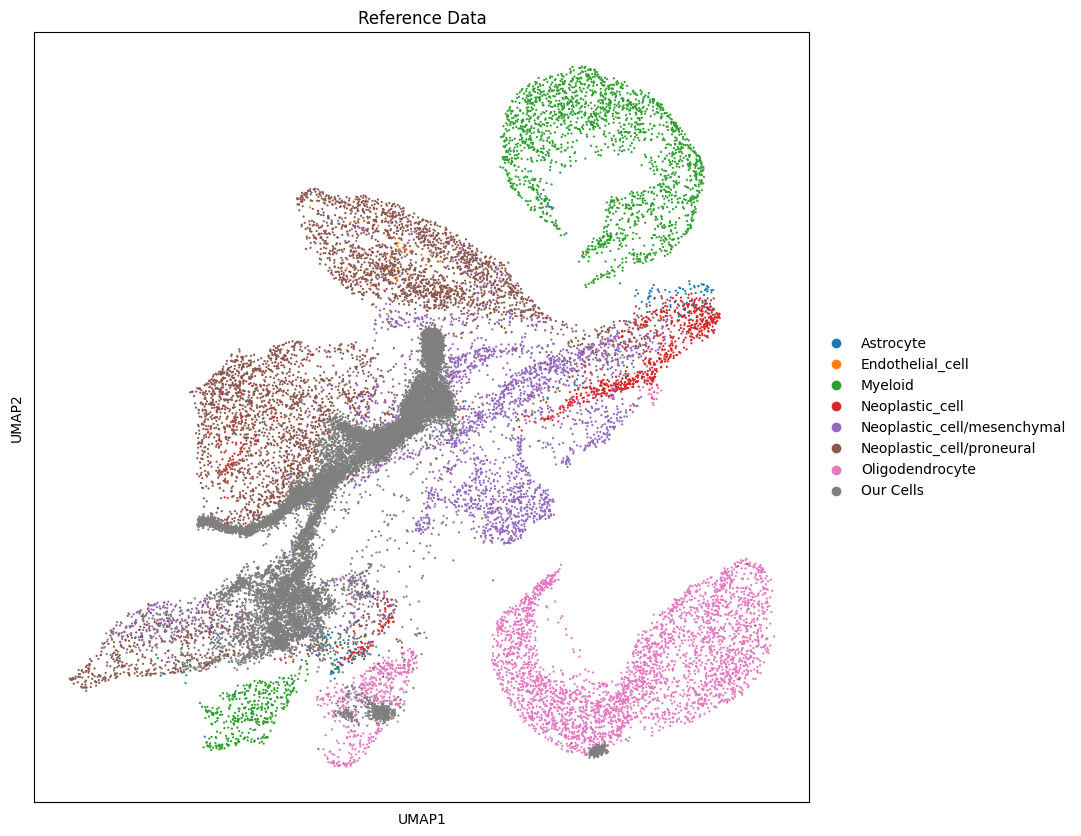

In [290]:
# replace NA with Our Cells
adata_ref_combined2 = adata_ref_combined.copy()
adata_ref_combined2.obs['cell_type'] = adata_ref_combined2.obs['cell_type'].cat.add_categories('Our Cells')
adata_ref_combined2.obs['cell_type'] = adata_ref_combined2.obs['cell_type'].fillna('Our Cells')
sc.pl.umap(adata_ref_combined2, color=['cell_type'], size=10, title="Reference Data")

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


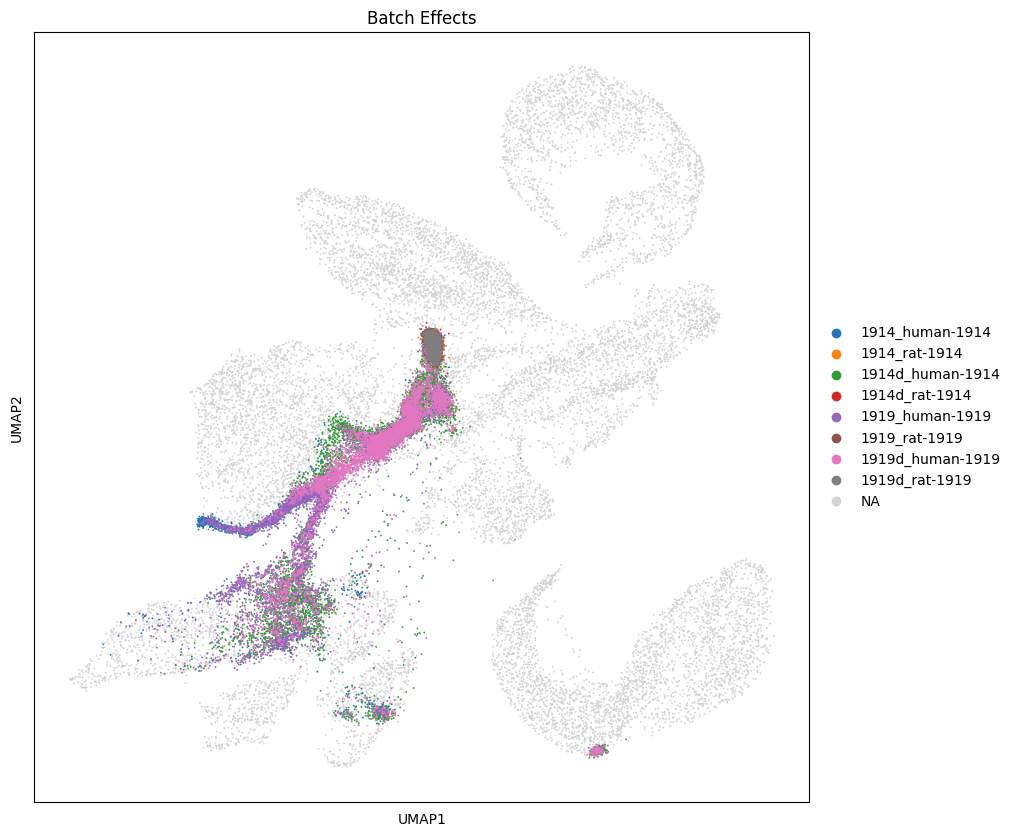

In [321]:
sc.pl.umap(adata_ref_combined, color=['sample_type'], size=7, title="Batch Effects")

# adata_temp = adata_ref_combined.copy()
# # do it without any sample type that contains rat in it
# adata_temp.obs['sample_type'] = adata_temp.obs['sample_type'].cat.remove_categories(adata_temp.obs['sample_type'].cat.categories[adata_temp.obs['sample_type'].cat.categories.str.contains('rat')])
# sc.pl.umap(adata_temp, color=['sample_type'], size=7, title="Batch Effects")

# adata_temp = adata_ref_combined.copy()
# # do it without any sample type that contains human in it
# adata_temp.obs['sample_type'] = adata_temp.obs['sample_type'].cat.remove_categories(adata_temp.obs['sample_type'].cat.categories[adata_temp.obs['sample_type'].cat.categories.str.contains('human')])
# sc.pl.umap(adata_temp, color=['sample_type'], size=7, title="Batch Effects")

In [311]:
# shortcut to load total_data
# adata_total_combined = sc.read_h5ad('write/reisolated_data_final.h5ad')
# sc.pp.neighbors(adata_total_combined)
# sc.tl.umap(adata_total_combined)

In [322]:
var_names = adata_ref_combined.var_names.intersection(adata_total_combined.var_names)
adata_ref = adata_ref_combined[:, var_names]
adata_total = adata_total_combined[:, var_names]

In [325]:
adata_ref

View of AnnData object with n_obs × n_vars = 82276 × 20484
    obs: 'cell_type', 'batch', 'louvain', 'sample_type', 'clusters', 'cell_type_2', 'cell_type_3', 'size'
    var: 'gene_ids-1914_human-1914-new', 'feature_types-1914_human-1914-new', 'genome-1914_human-1914-new', 'gene_ids-1914_rat-1914-new', 'feature_types-1914_rat-1914-new', 'genome-1914_rat-1914-new', 'gene_ids-1914d_human-1914-new', 'feature_types-1914d_human-1914-new', 'genome-1914d_human-1914-new', 'gene_ids-1914d_rat-1914-new', 'feature_types-1914d_rat-1914-new', 'genome-1914d_rat-1914-new', 'gene_ids-1919_human-1919-new', 'feature_types-1919_human-1919-new', 'genome-1919_human-1919-new', 'gene_ids-1919_rat-1919-new', 'feature_types-1919_rat-1919-new', 'genome-1919_rat-1919-new', 'gene_ids-1919d_human-1919-new', 'feature_types-1919d_human-1919-new', 'genome-1919d_human-1919-new', 'gene_ids-1919d_rat-1919-new', 'feature_types-1919d_rat-1919-new', 'genome-1919d_rat-1919-new', 'gene_ids-ref', 'feature_types-ref'
    uns: '

In [313]:
adata_total.obs['clusters'] = adata_total.obs['louvain']


/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_76299/3355034385.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_total.obs['clusters'] = adata_total.obs['louvain']


In [328]:
# Fitting our data to reference data
sc.tl.ingest(adata_total, adata_ref, obs='louvain')


ValueError: There is no neighbors data in `adata.uns["neighbors"]`.
Please run pp.neighbors.

In [70]:
# make new category obs based on index name after -1-
adata_total.obs['sample_type'] = adata_total.obs.index.str.split('-1-').str[1]


In [326]:
adata_concat = adata_ref.concatenate(adata_total, batch_categories=['ref', 'new'])


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [331]:
# shortcut for getting concatenated data
adata_concat = sc.read_h5ad('write/final_concat.h5ad')

cell_type batch  \
AAACCCAAGAAGGTAG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAAGACCTCCG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCACAACTTGGT-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAGTCTACGAT-1-SF10022-ref                     Oligodendrocyte   ref   
AAACCCAGTTATCTTC-1-SF10022-ref         Neoplastic_cell/mesenchymal   ref   
...                                                            ...   ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new                          NaN   new   

                                      louvain     sample_type clusters  \
AAACCCAAGAAGGTAG-1-SF10022-ref              1             NaN      NaN   
AAACCCAAGACCTCCG-1-SF10022-ref              1             NaN      NaN   
AAACCCACAACTTGGT-1-SF10022-ref              1             NaN      NaN   
AAACCCAGTCTACGAT-1-SF10022-ref              2             NaN      NaN   
AAACCCAGTTATCTTC-1-SF10022-ref              1             NaN      NaN   
...                                       ...             ...      ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new       0  1919d_rat-1919       35   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new       0  1919d_rat-1919       16   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new       0  1919d_rat-1919       18   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new       0  1919d_rat-1919       24   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new       0  1919d_rat-1919       24   

                                                    cell_type_2  \
AAACCCAAGAAGGTAG-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCAAGACCTCCG-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCACAACTTGGT-1-SF10022-ref         Stem Cells (Mesenchymal)   
AAACCCAGTCTACGAT-1-SF10022-ref             Oligodendyrocye-like   
AAACCCAGTTATCTTC-1-SF10022-ref         Stem Cells (Mesenchymal)   
...                                                         ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new               Endothelial   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new               Endothelial   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new               Endothelial   

                                           cell_type_3  size  
AAACCCAAGAAGGTAG-1-SF10022-ref                     NaN     5  
AAACCCAAGACCTCCG-1-SF10022-ref                     NaN     5  
AAACCCACAACTTGGT-1-SF10022-ref                     NaN     5  
AAACCCAGTCTACGAT-1-SF10022-ref                     NaN     5  
AAACCCAGTTATCTTC-1-SF10022-ref                     NaN     5  
...                                                ...   ...  
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCCATACTT-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new  Rat Endothelial    10  
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new  Rat Endothelial    10  

[82276 rows x 8 columns]

In [350]:
# need to rerun pca and umap on concat
sc.pp.neighbors(adata_concat)
sc.tl.pca(adata_concat)
sc.tl.umap(adata_concat)

KeyboardInterrupt: 

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


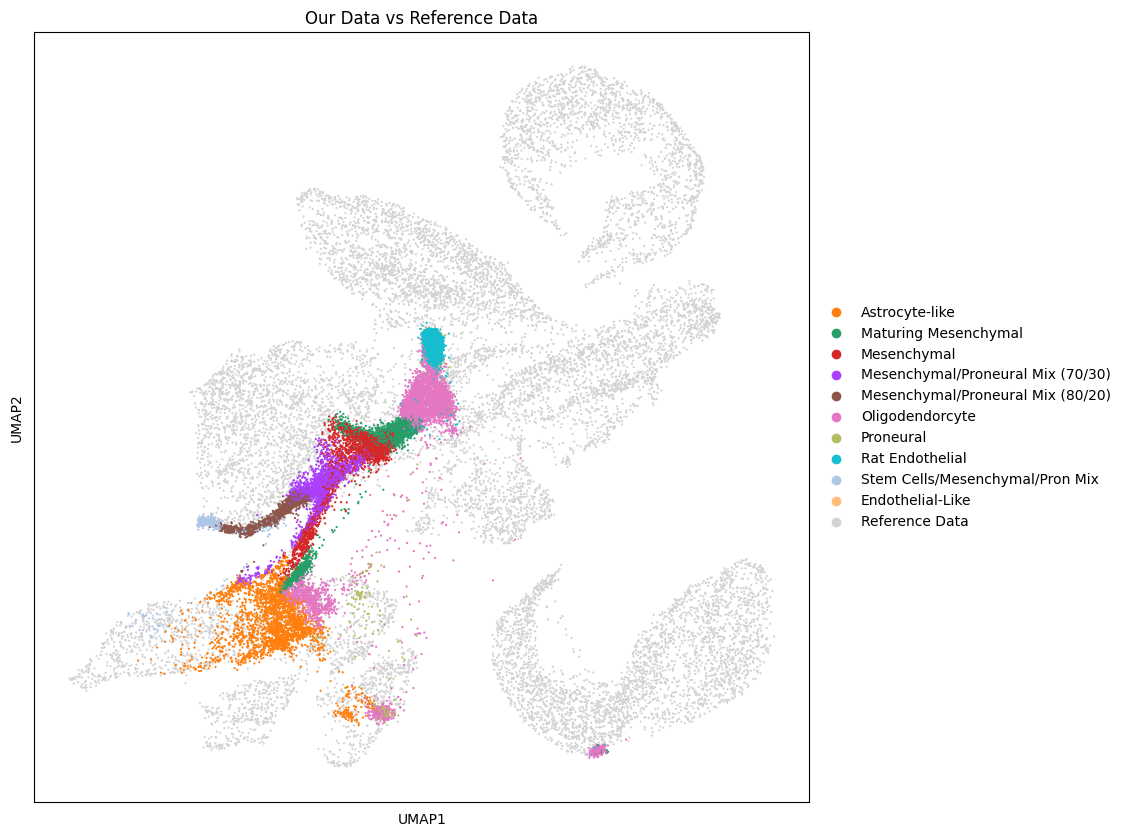

In [378]:
adata_temp = adata_concat.copy()
# # call all NA Reference data
# adata_temp.obs['cell_type_3'] = adata_temp.obs['cell_type_3'].cat.add_categories('Reference Data')
# adata_temp.obs['cell_type_3'] = adata_temp.obs['cell_type_3'].fillna('Reference Data')
# # make reference data light gray
# adata_temp.uns['cell_type_3_colors'] = ['#D3D3D3'] + adata_temp.uns['cell_type_3_colors']
# # move that color to the end of the list
# adata_temp.uns['cell_type_3_colors'] = adata_temp.uns['cell_type_3_colors'][-10:] + adata_temp.uns['cell_type_3_colors'][:-10]
# make the reference data the gray color
# adata_temp.obs['cell_type_3'] = adata_temp.obs['cell_type_3'].cat.reorder_categories(['Reference Data'] + adata_temp.obs['cell_type_3'].cat.categories[1:].tolist())
# remove all cells that contain rat in sample_type


sc.pl.umap(adata_temp, color=['cell_type_3'], size=10, title="Our Data vs Reference Data")

In [ ]:
# adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')
# adata_concat.obs.louvain.cat.reorder_categories(adata_ref.obs.louvain.cat.categories, inplace=True)  # fix category ordering
# adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix category colors


In [ ]:
# Remove rat cells where there the the word rat in sample type from the adata_concat
# adata_concat_no_rat = adata_concat[adata_concat.obs['sample_type'].str.contains('rat') == False]

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


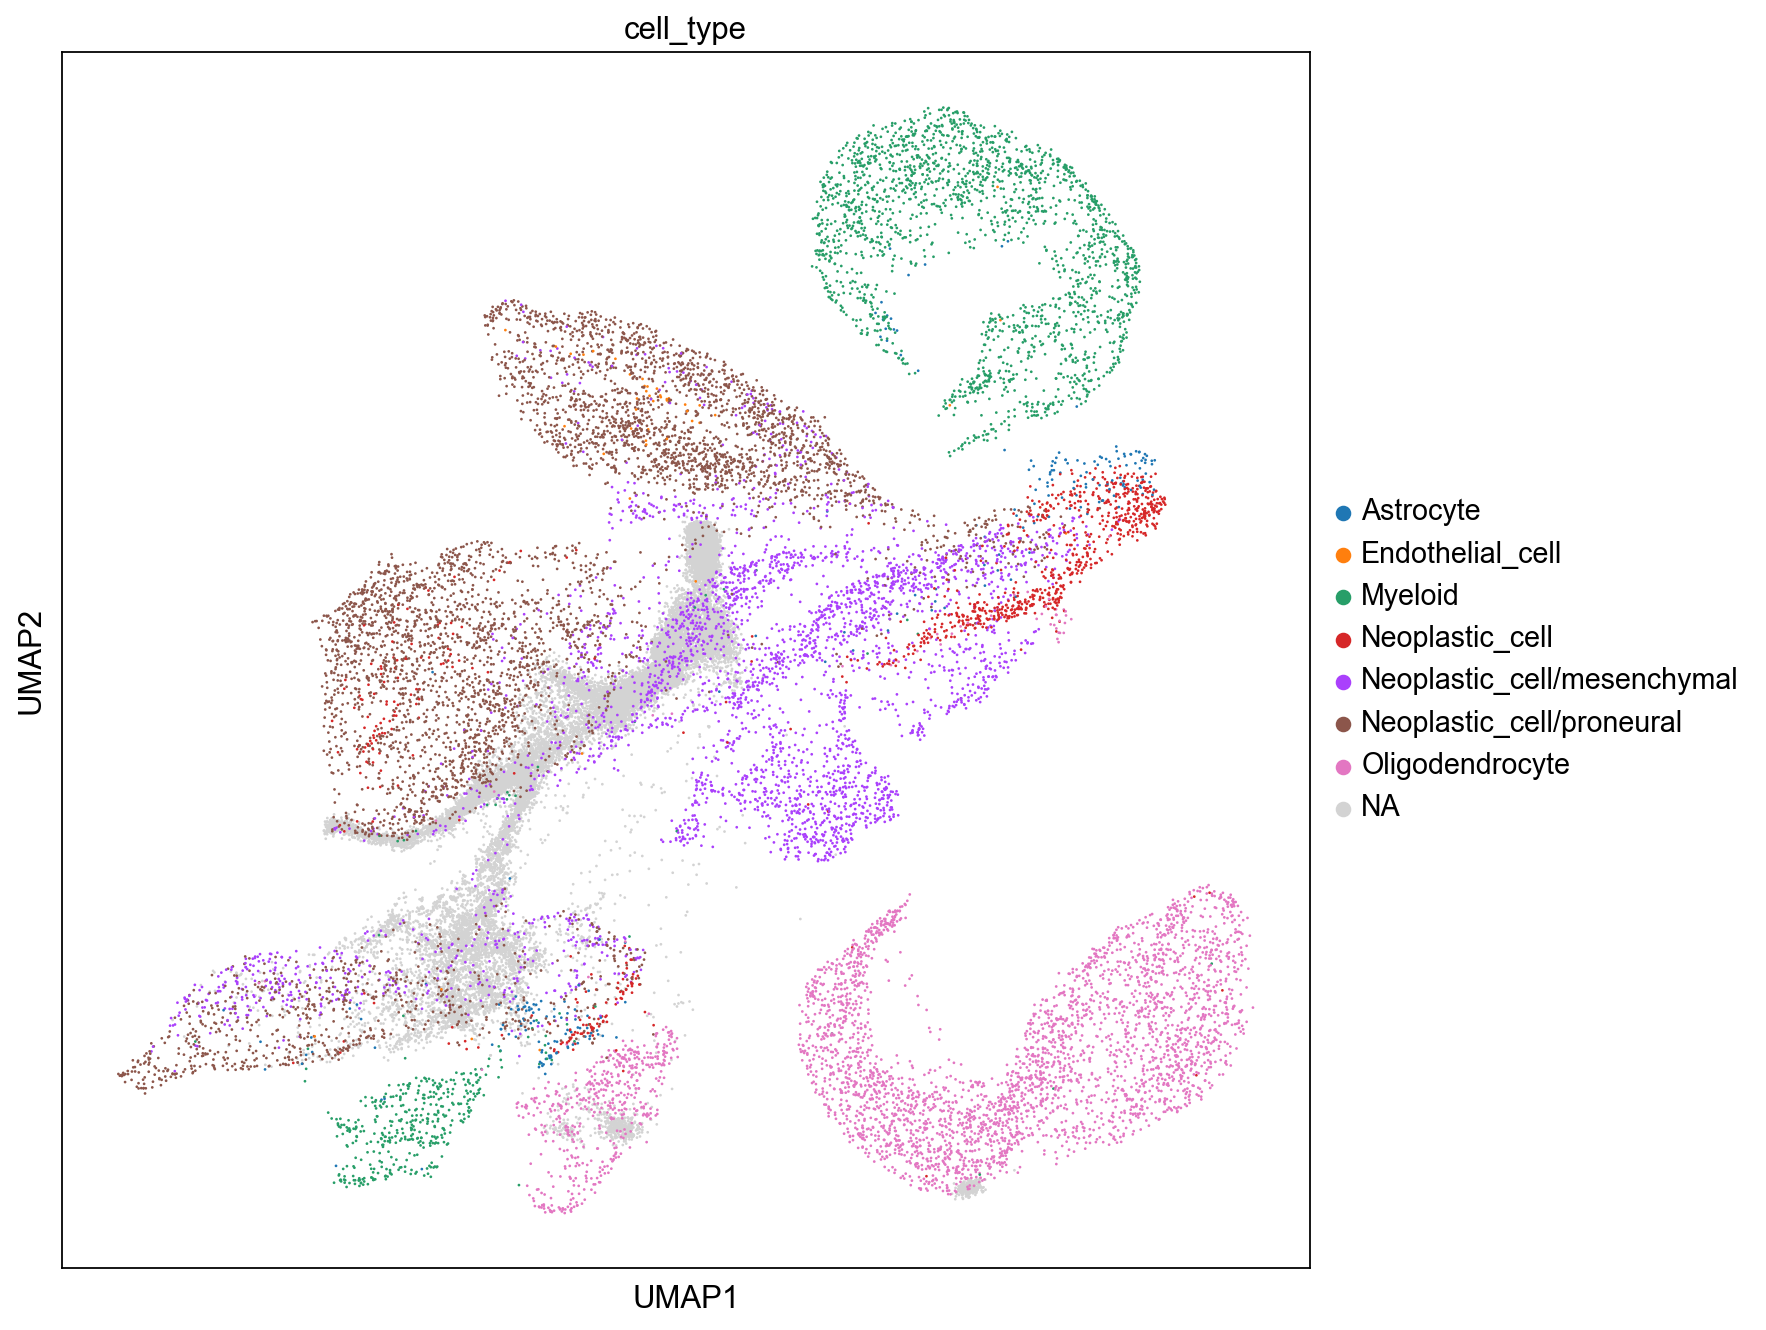

In [131]:

# make the image bigger
sc.set_figure_params(dpi=80, facecolor='white', figsize=(10, 10))

# set size column that everything that has cell_type is 10 and everything else is 1
adata_concat.obs['size'] = 6

sc.pl.umap(adata_concat, color=['cell_type'], wspace=0.5, size=adata_concat.obs['size'])

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


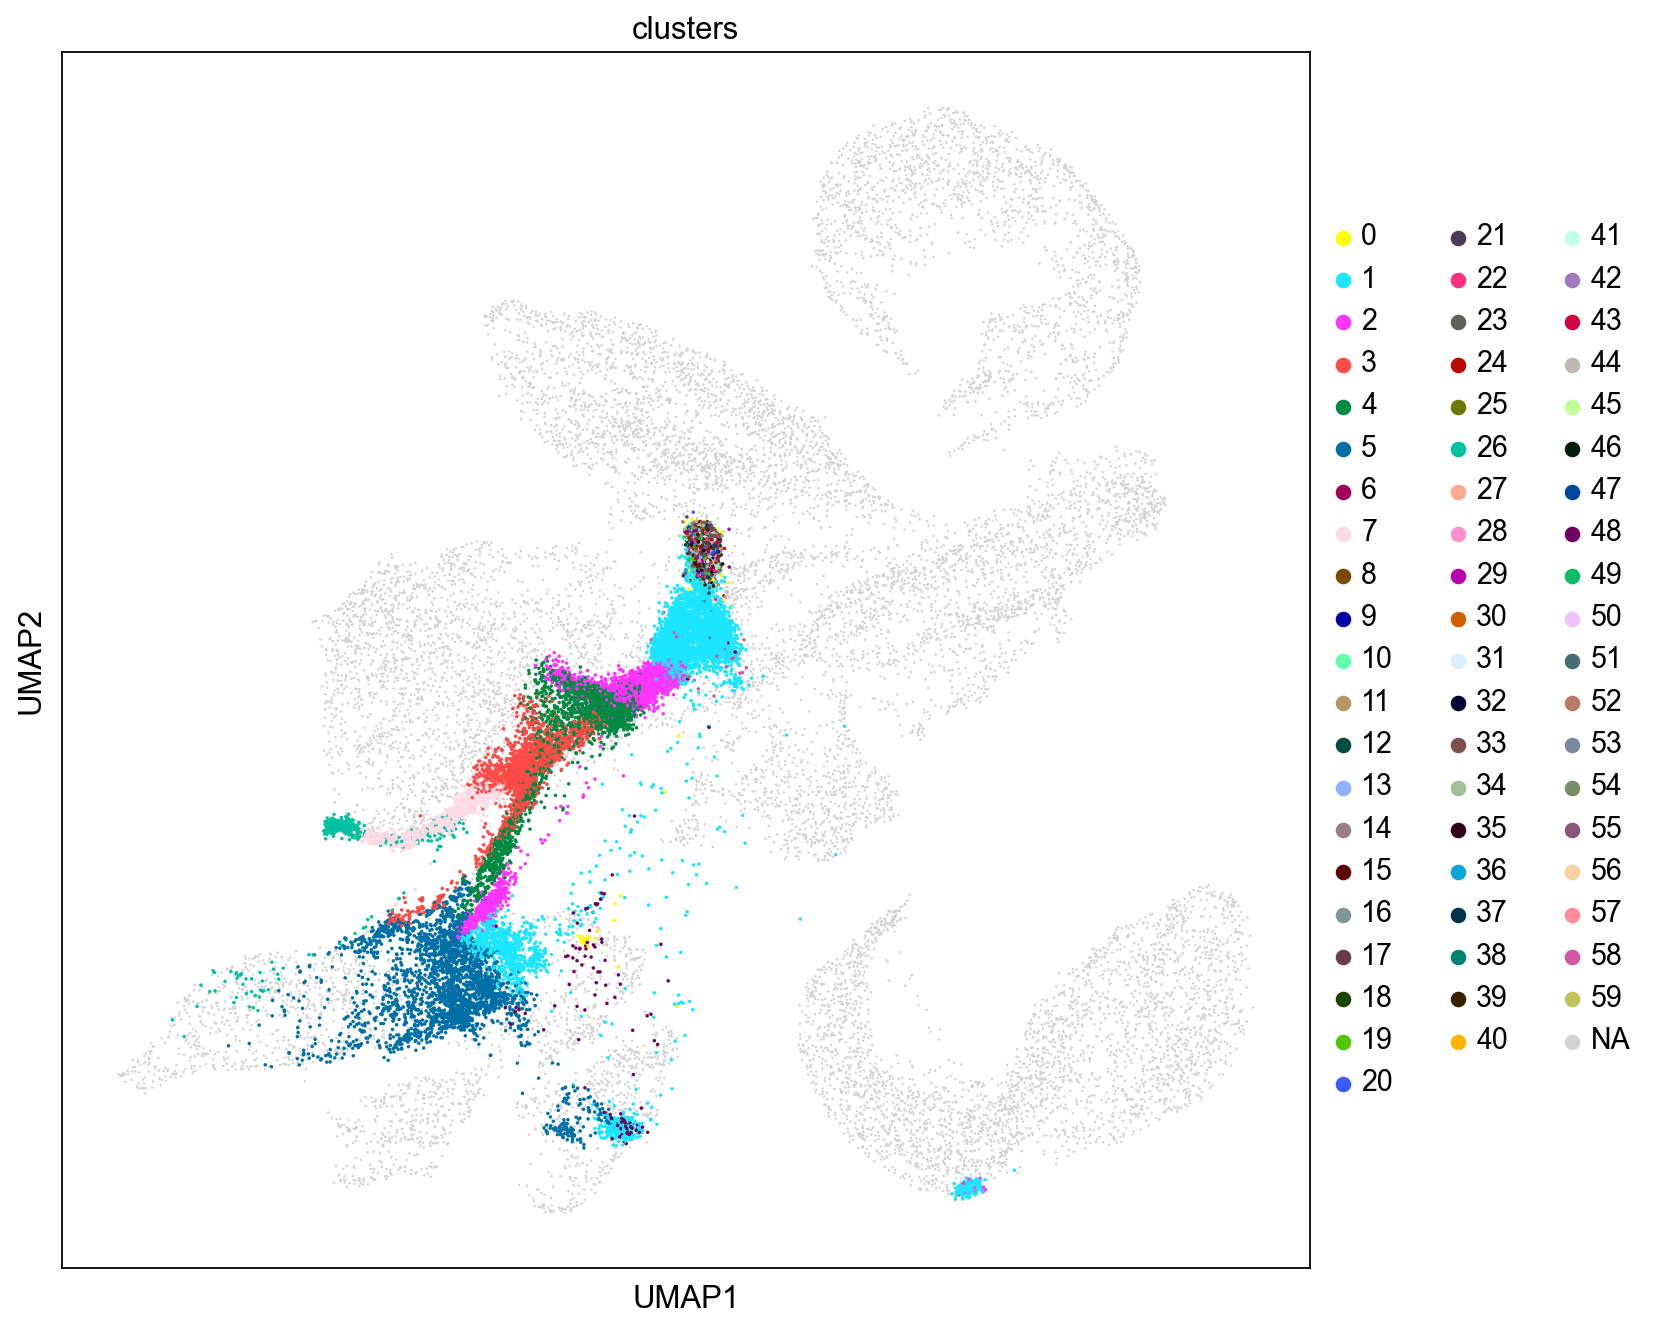

In [132]:
# make the dots of of everything with 'cell_type' category that is not NA bigger
adata_concat.obs['size'] = 10
adata_concat.obs.loc[adata_concat.obs['cell_type'].notna(), 'size'] = 5

sc.pl.umap(adata_concat, color=['clusters'], wspace=0.5, size=adata_concat.obs['size'])

## Analyzing Cluster

In [ ]:
# for each louvain cluster, plot the cell type distribution
for i in adata_concat.obs.louvain.cat.categories:
    print(i)
    try:
        sc.pl.umap(adata_concat[adata_concat.obs.louvain == i], color=['clusters'])
        
    except:
        pass

In [133]:
# cell_type_2 is based on louvain: cluster 0 = endothelial, cluster 1 = Stem Cells (Mesenchymal), Cluster 2 = Oligodendyrocye-like, Cluster 6 = Astrocyte-like, Cluster 7 = Stem Cells (Mesenchymal, Proneural Mix), Cluster 8 = Stem Cells (Mesenchymal, Proneural Mix)
# for all louvain cluster 0, set cell_type_2 to be Endothelial
# drop cell_type_3
# adata_concat.obs.drop(columns=['cell_type_3'], inplace=True)
adata_concat.obs.loc[adata_concat.obs.clusters == '2', 'cell_type_3'] = 'Maturing Mesenchymal'
adata_concat.obs.loc[adata_concat.obs.clusters == '3', 'cell_type_3'] = 'Mesenchymal/Proneural Mix (70/30)'
adata_concat.obs.loc[adata_concat.obs.clusters == '4', 'cell_type_3'] = 'Mesenchymal'
adata_concat.obs.loc[adata_concat.obs.clusters == '7', 'cell_type_3'] = 'Mesenchymal/Proneural Mix (80/20)'
adata_concat.obs.loc[adata_concat.obs.clusters == '26', 'cell_type_3'] = 'Stem Cells/Mesenchymal/Pron Mix'
adata_concat.obs.loc[adata_concat.obs.clusters == '1', 'cell_type_3'] = 'Oligodendorcyte'
adata_concat.obs.loc[adata_concat.obs.clusters == '0', 'cell_type_3'] = 'Proneural'
adata_concat.obs.loc[adata_concat.obs.clusters == '48', 'cell_type_3'] = 'Proneural'
adata_concat.obs.loc[adata_concat.obs.clusters == '5', 'cell_type_3'] = 'Astrocyte-like'

# for everything that is not na, but does have a cell type in cell_type, set cell_type_3 to be the same as cell_type
# for everything that does not have a cell type in cell_type, and does not have a cell_type_3 set to be rat_endothelial
adata_concat.obs.loc[adata_concat.obs.cell_type_3.isna() & adata_concat.obs.cell_type.isna(), 'cell_type_3'] = 'Rat Endothelial'

# adata_concat.obs.loc[adata_concat.obs.cell_type_3.isna() & adata_concat.obs.cell_type.notna(), 'cell_type_3'] = adata_concat.obs.cell_type


In [135]:
# save the adata_concat
adata_concat.write('concat_final.h5ad')


## Reisolating Data

In [245]:
# shortcut for importing the adata_concat
adata_concat = sc.read('write/concat_final.h5ad')

# renormalize and log and neighbours umap adata_new
adata_new = adata_concat[adata_concat.obs['batch'] == 'new']

sc.tl.pca(adata_new, svd_solver='arpack')
sc.pp.neighbors(adata_new, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_new)
sc.tl.leiden(adata_new, resolution=0.5)


In [246]:
adata_new.obs.loc[adata_new.obs.cell_type_3.isna(), 'cell_type_3'] = 'Rat Endothelial'

# add human endothelial to the categories
adata_new.obs.cell_type_3.cat.add_categories('Human Endothelial', inplace=True)
adata_new.obs.cell_type_3.cat.add_categories('Endothelial-Like', inplace=True)

/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_76299/407034935.py:4: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata_new.obs.cell_type_3.cat.add_categories('Human Endothelial', inplace=True)
/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_76299/407034935.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.add_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata_new.obs.cell_type_3.cat.add_categories('Endothelial-Like', inplace=True)


In [247]:
# change all rat_endothelial that is actually human to human endothelial
adata_new.obs.loc[(adata_new.obs['sample_type'].str.contains('human')) & (adata_new.obs['cell_type_3'] == 'rat_endothelial'), 'cell_type_3'] = 'Human Endothelial'

In [248]:
# change cell_type_3 for anything in cluster 14 that is human to be endothelial-like
adata_new.obs.loc[(adata_new.obs['sample_type'].str.contains('human')) & (adata_new.obs['leiden'] == '14'), 'cell_type_3'] = 'Endothelial-Like'

In [249]:
# convert human endothelial to endothelial-like
adata_new.obs.loc[adata_new.obs['cell_type_3'] == 'Human Endothelial', 'cell_type_3'] = 'Endothelial-Like'

In [250]:
adata_new.write('write/reisolated_data_final.h5ad')


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


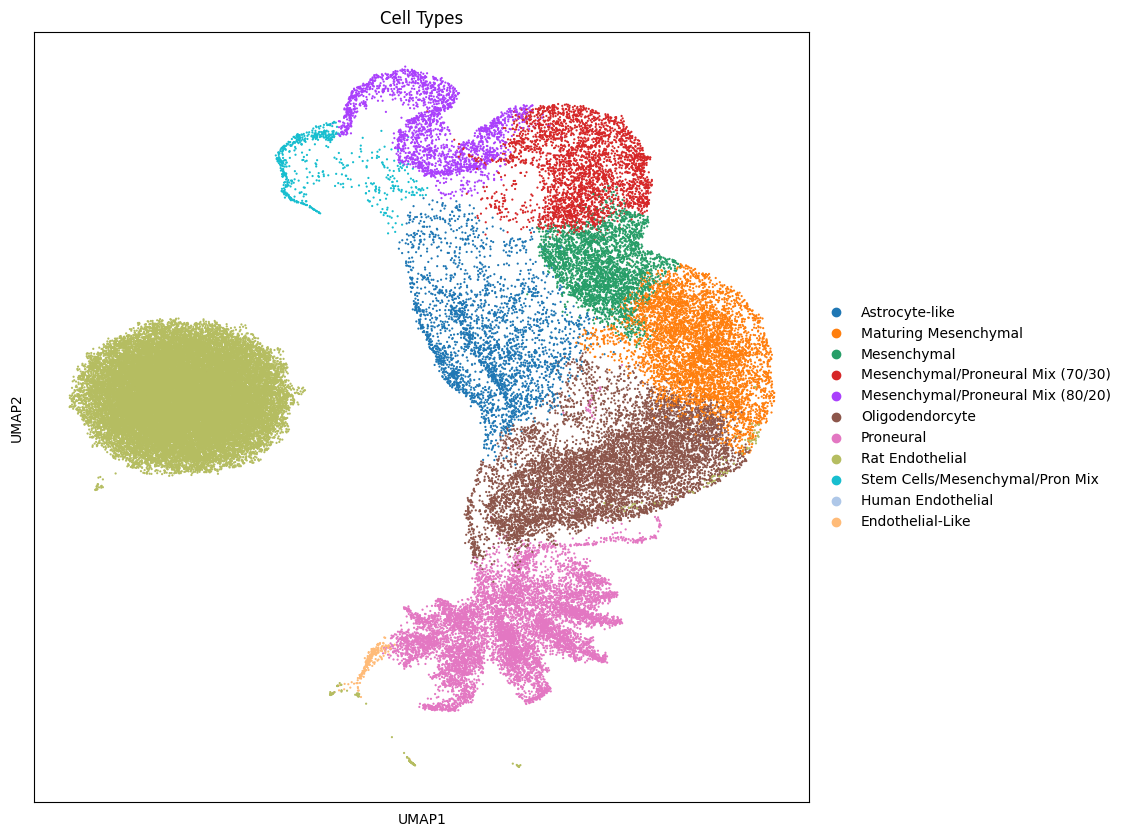

In [397]:
# make figure bigger
plt.rcParams['figure.figsize'] = [10, 10]
sc.pl.umap(adata_new, color=['cell_type_3'], size=10, title="Cell Types")


## No rat

In [260]:
adata_new_no_rat = adata_new[adata_new.obs['sample_type'].str.contains('rat') == False]
# drop the rat endothelial cells

sc.tl.pca(adata_new_no_rat, svd_solver='arpack')
sc.pp.neighbors(adata_new_no_rat, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_new_no_rat)
sc.tl.leiden(adata_new_no_rat, resolution=0.5)

# convert any remaining Rat Endothelial to Endothelial-Like
adata_new_no_rat.obs.loc[adata_new_no_rat.obs['cell_type_3'] == 'Rat Endothelial', 'cell_type_3'] = 'Endothelial-Like'


In [261]:

# convert any remaining Rat Endothelial to Endothelial-Like
adata_new_no_rat.obs.loc[adata_new_no_rat.obs['cell_type_3'] == 'Rat Endothelial', 'cell_type_3'] = 'Endothelial-Like'
adata_new_no_rat.obs.cell_type_3.cat.remove_categories('Rat Endothelial', inplace=True)


/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_76299/588528725.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata_new_no_rat.obs.cell_type_3.cat.remove_categories('Rat Endothelial', inplace=True)


In [263]:
# remove Rat Endothelial as a category
adata_new_no_rat.obs.cell_type_3.cat.remove_categories('Rat Endothelial', inplace=True)

/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_76299/830350463.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  adata_new_no_rat.obs.cell_type_3.cat.remove_categories('Rat Endothelial', inplace=True)


ValueError: removals must all be in old categories: {'Rat Endothelial'}

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


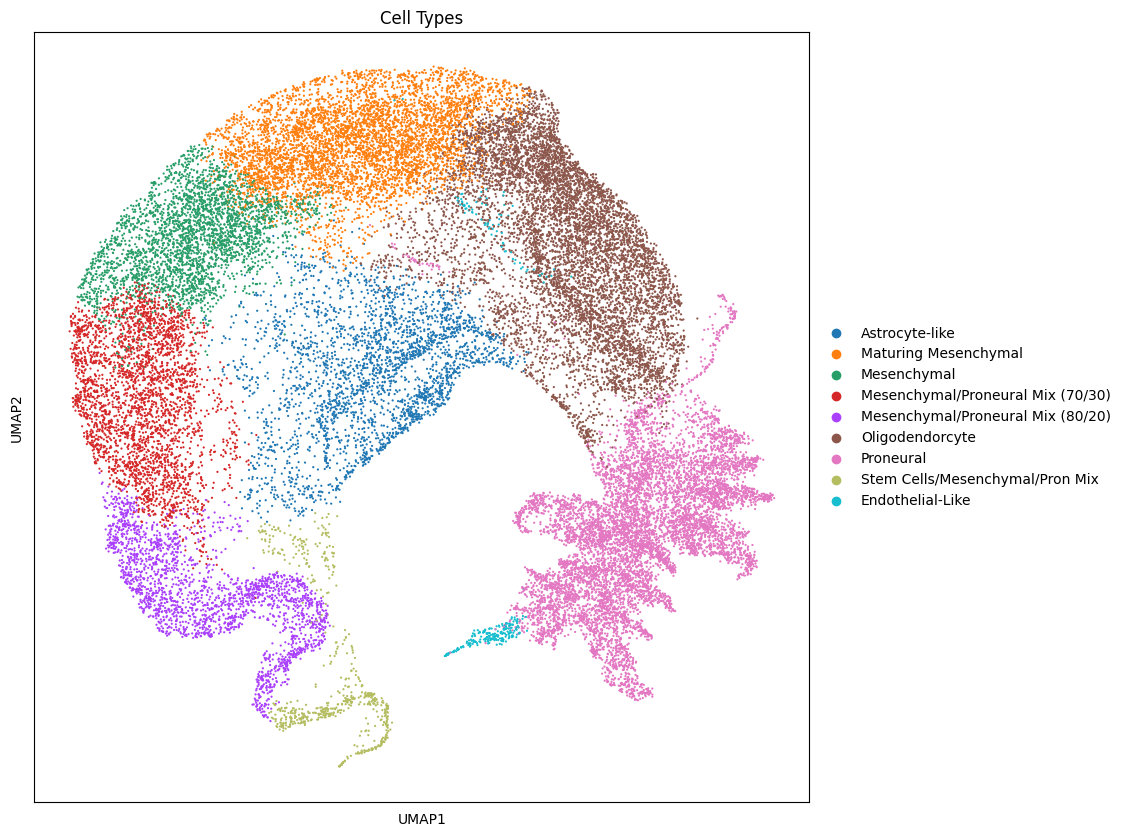

In [265]:
sc.pl.umap(adata_new_no_rat, color="cell_type_3", title="Cell Types", size=10)


In [ ]:
adata_new_no_rat.write('write/reisolated_data_no_rat_final.h5ad')

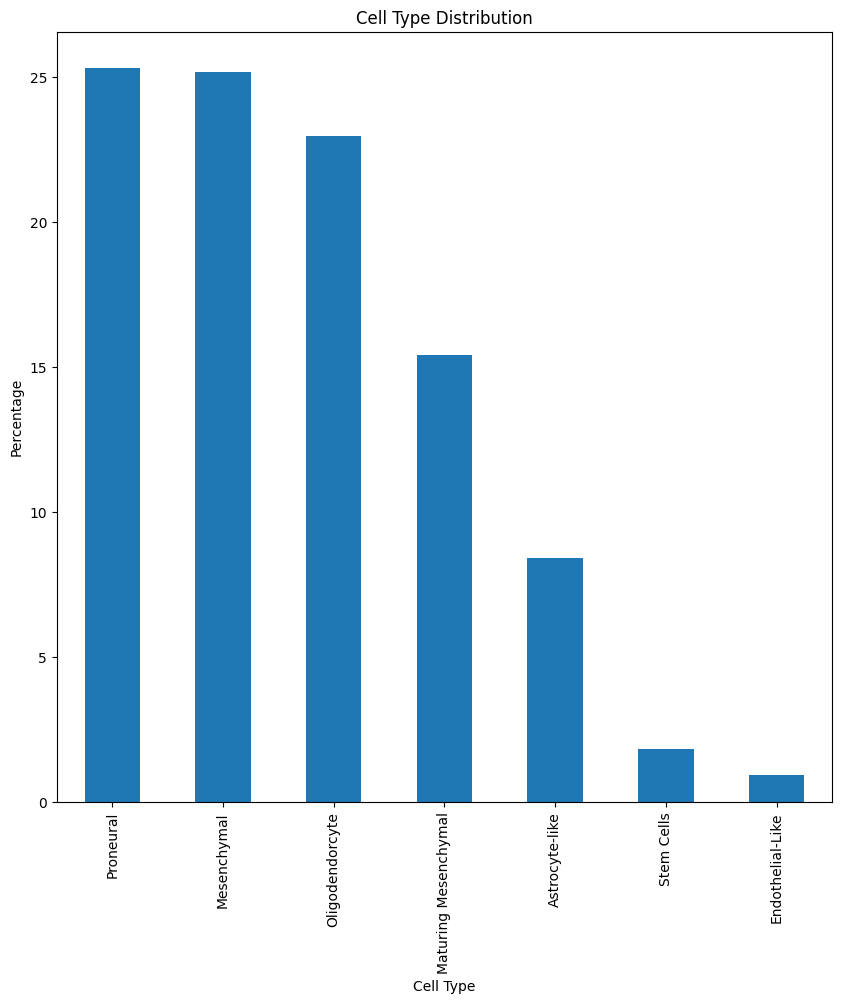

In [408]:
# Replace the specified category names
adata_new_no_rat.obs['cell_type_3'] = adata_new_no_rat.obs['cell_type_3'].replace({
    'Mesenchymal/Proneural Mix (70/30)': 'Mesenchymal',
    'Mesenchymal/Proneural Mix (80/20)': 'Mesenchymal',
    'Stem Cells/Mesenchymal/Pron Mix': 'Stem Cells'
})

# Plot the cell type distribution as a bar chart with updated category names and percentages
plt.rcParams['figure.figsize'] = [10, 10]

# Get the cell type counts
cell_type_counts = adata_new_no_rat.obs['cell_type_3'].value_counts()

# Get the cell type percentages
cell_type_percents = cell_type_counts / cell_type_counts.sum() * 100

# Plot the cell type percentages as a bar chart
cell_type_percents.plot.bar()

# Add labels to the plot
plt.xlabel('Cell Type')

plt.ylabel('Percentage')

plt.title('Cell Type Distribution')

# Show the plot



plt.show()



## Trajectory Analysis

In [238]:
# remote the rat endothelial cells
sc.tl.paga(adata_new_no_rat, groups='cell_type_3')


running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)


--> added 'pos', the PAGA positions (adata.uns['paga'])


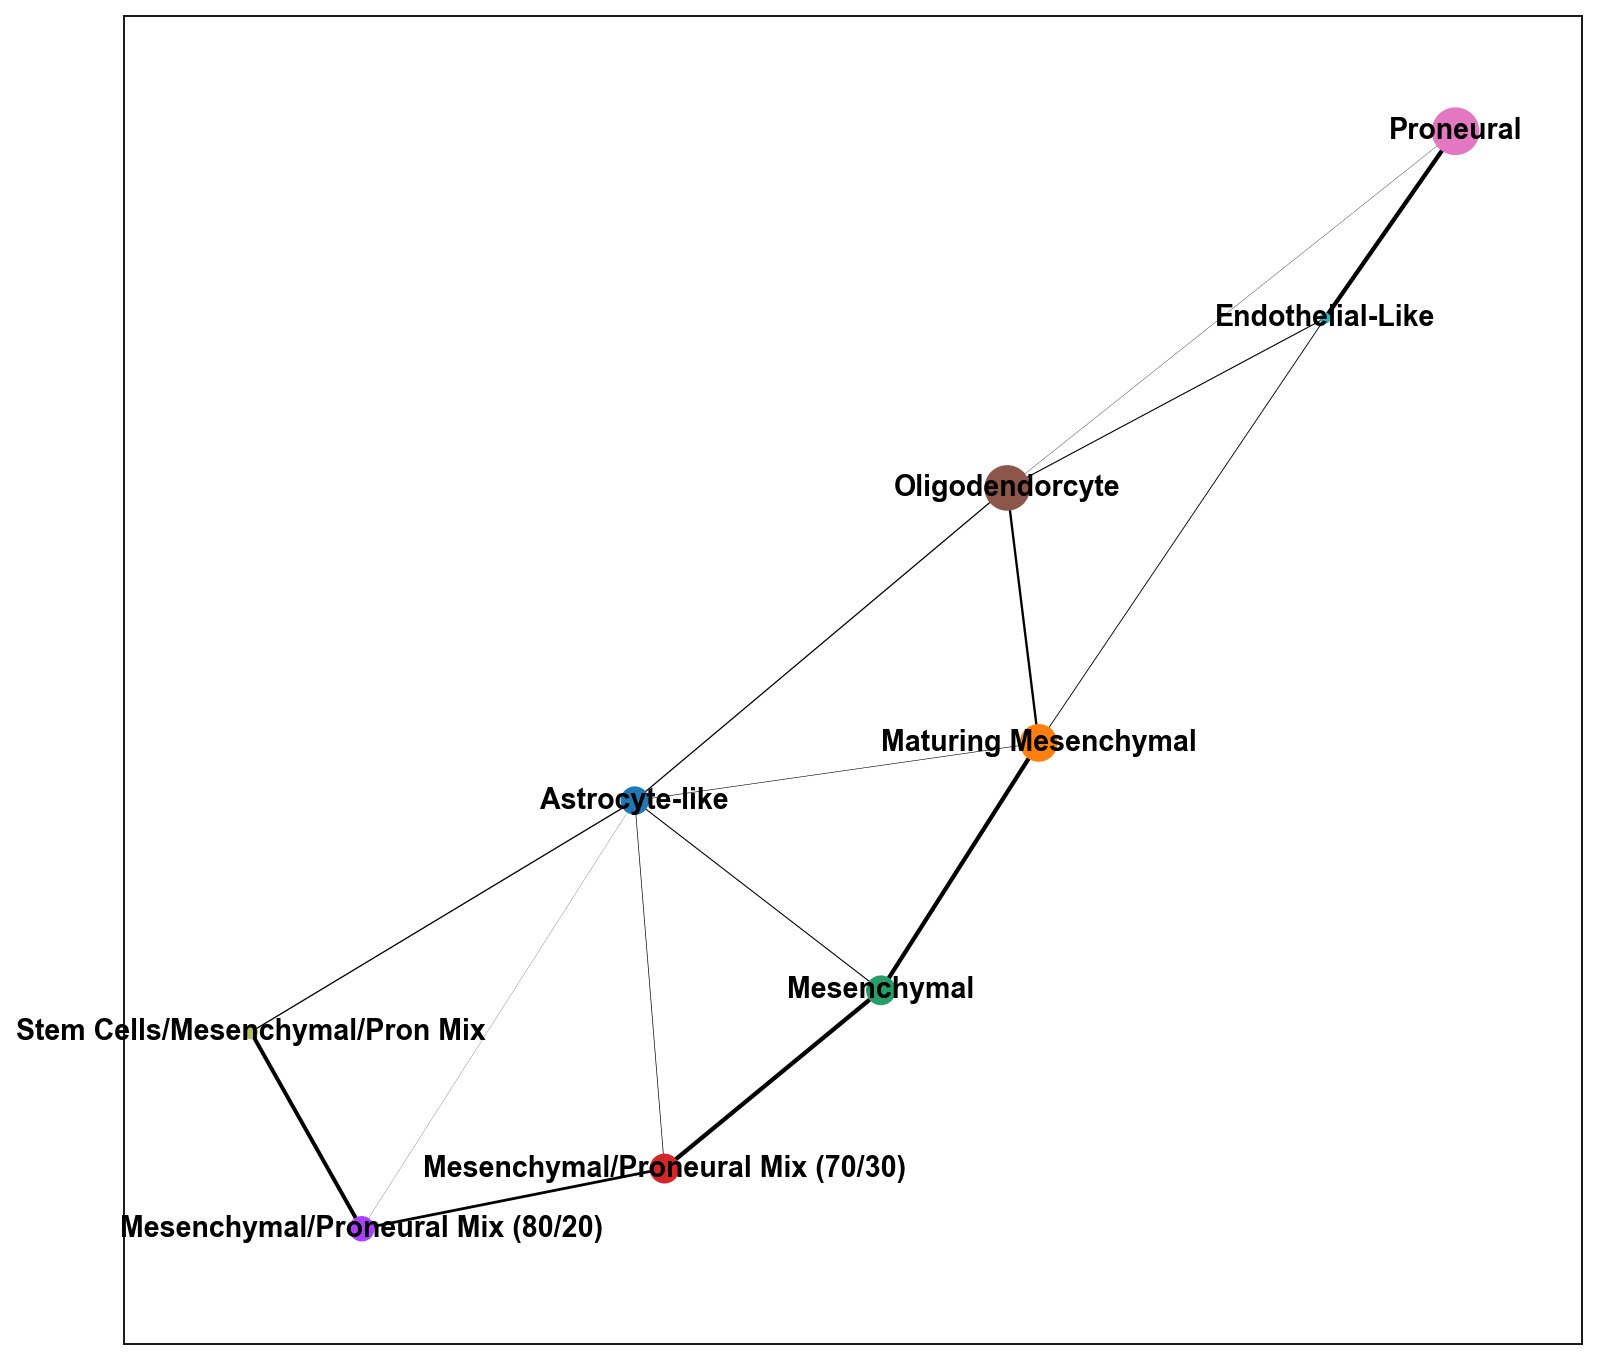

In [239]:
# plot paga
sc.pl.paga(adata_new_no_rat, node_size_scale=1, node_size_power=1, layout='fr')

## Ivy Glioblastoma Atlas Project Analysis (IVY-GAP)

In [81]:
# shortcut to get human_combined-final
import scanpy as sc
adata_human_combined = sc.read('write/human_combined_final.h5ad')

In [83]:
# redo umap 
sc.pp.neighbors(adata_human_combined, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_human_combined)



/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


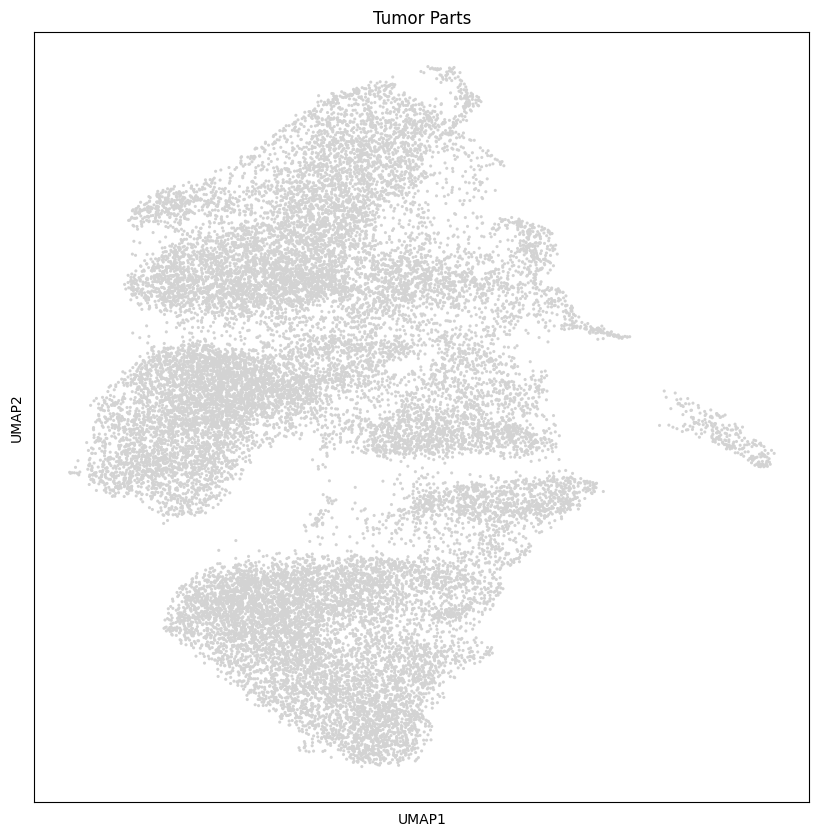

In [412]:
sc.pl.umap(adata_human_combined, size=20, title="Tumor Parts")

In [495]:
adata_copy2 = adata_human_combined.copy()

In [521]:
necrosis_gene_list = ["PGK1", "NDRG1", "HK2", "TNFAIP3", "ANGPTL4", "LIF", "IDS"]
ct_gene_list = ["IGFBP2", "DANCR", "MYC", "TIMP1", "EZH2"]
infiltrating_gene_list = ["SLC20A2", "DANCR", "GABBR2", "HS6ST1", "RARRES1", "ATP1B1", "SCN2A"]
leading_edge = ["BIRC5", "CCNB2", "CCNB1"]
perinectoric_zone = ["CD44"]
# all genes:
total_list = necrosis_gene_list + ct_gene_list + infiltrating_gene_list + leading_edge + perinectoric_zone


In [241]:
# sc.pl.umap(adata_human_combined, color=infiltrating_gene_list)

In [497]:
necrosis_data = adata_copy2[:, necrosis_gene_list].X
necrosis_expression = np.sum(necrosis_data, axis=1)

ct_data = adata_copy2[:, ct_gene_list].X
ct_expression = np.sum(ct_data, axis=1)

infiltrating_data = adata_copy2[:, infiltrating_gene_list].X
infiltrating_expression = np.sum(infiltrating_data, axis=1)

leading_edge_data = adata_copy2[:, leading_edge].X
leading_edge_expression = np.sum(leading_edge_data, axis=1)

perinectoric_zone_data = adata_copy2[:, perinectoric_zone].X
perinectoric_zone_expression = np.sum(perinectoric_zone_data, axis=1)


In [498]:
import pandas as pd
import matplotlib.pyplot as plt
# Update the obs dataframe using pandas.DataFrame.assign()
adata_copy2.obs = adata_copy2.obs.assign(necrosis_expression=pd.Series(necrosis_expression, index=adata_copy2.obs.index))
adata_copy2.obs = adata_copy2.obs.assign(ct_expression=pd.Series(ct_expression, index=adata_copy2.obs.index))
adata_copy2.obs = adata_copy2.obs.assign(infiltrating_expression=pd.Series(infiltrating_expression, index=adata_copy2.obs.index))
adata_copy2.obs = adata_copy2.obs.assign(leading_edge_expression=pd.Series(leading_edge_expression, index=adata_copy2.obs.index))
adata_copy2.obs = adata_copy2.obs.assign(perinectoric_zone_expression=pd.Series(perinectoric_zone_expression, index=adata_copy2.obs.index))


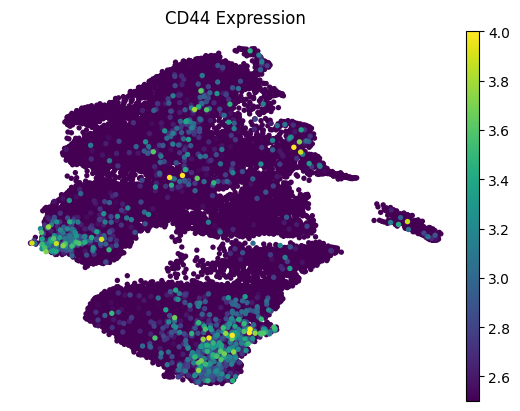

<Figure size 640x480 with 0 Axes>

In [234]:
sc.pl.umap(adata_copy2, color=["CD44"], frameon=False, size=60, vmax=4, vmin=2.5, title="CD44 Expression")
# save figure to file
plt.savefig('figures/CD44_expression.png', dpi=300, bbox_inches='tight')


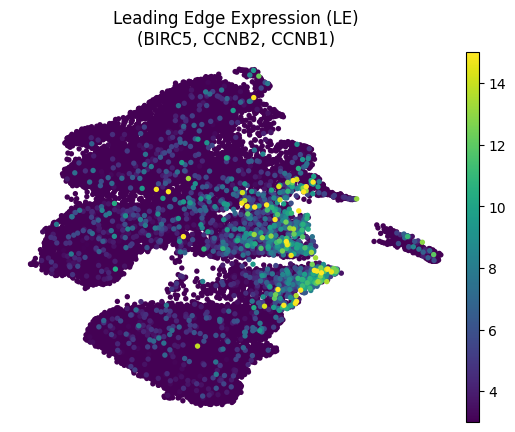

<Figure size 640x480 with 0 Axes>

In [235]:
# include subtitle to write BIRC5, CCNB2, CCNB1
sc.pl.umap(adata_copy2, color=['leading_edge_expression'], frameon=False, size=60, vmin= 3, vmax=15, title="Leading Edge Expression (LE)\n(BIRC5, CCNB2, CCNB1)")
plt.savefig('figures/leading_edge_expression.png', dpi=300, bbox_inches='tight')

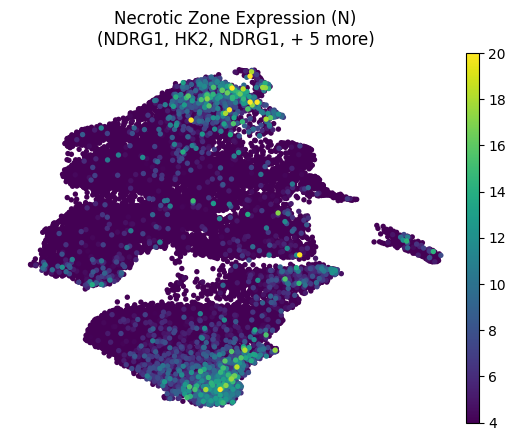

<Figure size 640x480 with 0 Axes>

In [236]:
sc.pl.umap(adata_copy2, color='necrosis_expression', frameon=False , size=60, vmax=20 ,vmin=4, title="Necrotic Zone Expression (N)\n(NDRG1, HK2, NDRG1, + 5 more)")
plt.savefig('figures/necrosis_expression.png', dpi=300, bbox_inches='tight')


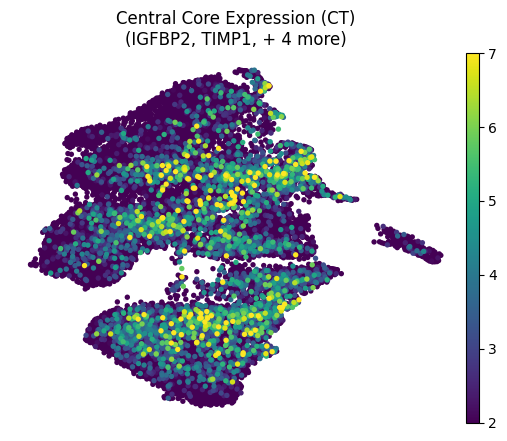

<Figure size 640x480 with 0 Axes>

In [239]:
sc.pl.umap(adata_copy2, color='ct_expression', frameon=False , size=60, vmax=7, vmin=2, title="Central Core Expression (CT)\n(IGFBP2, TIMP1, + 4 more)")
plt.savefig('figures/ct_expression.png', dpi=300, bbox_inches='tight')

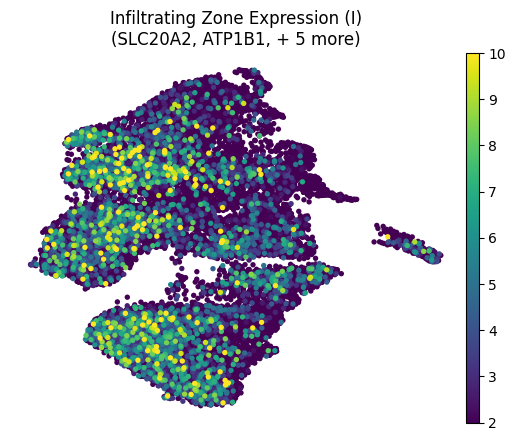

<Figure size 640x480 with 0 Axes>

In [240]:
sc.pl.umap(adata_copy2, color='infiltrating_expression', frameon=False , size=60, vmax=10, vmin=2, title="Infiltrating Zone Expression (I)\n(SLC20A2, ATP1B1, + 5 more)")
plt.savefig('figures/infiltrating_expression.png', dpi=300, bbox_inches='tight')

In [499]:
# # make a new obs depending on zone of expression
adata_copy2.obs['zone'] = 'other'
adata_copy2.obs.loc[adata_copy2.obs['necrosis_expression'] > 4, 'zone'] = 'necrosis'
adata_copy2.obs.loc[adata_copy2.obs['ct_expression'] > 2, 'zone'] = 'ct'
adata_copy2.obs.loc[adata_copy2.obs['infiltrating_expression'] > 2, 'zone'] = 'infiltrating'
adata_copy2.obs.loc[adata_copy2.obs['leading_edge_expression'] > 3, 'zone'] = 'leading_edge'
adata_copy2.obs.loc[adata_copy2.obs['perinectoric_zone_expression'] > 2, 'zone'] = 'perinectoric_zone'


# Add gene expression data to the .obs DataFrame
adata_copy2.obs[total_list] = adata_copy2[:, total_list].X.toarray()

# Group the data by 'zone' and compute the mean expression for each gene
mean_expression_by_zone = adata_copy2.obs.groupby('zone')[total_list].mean()

# # Create a new AnnData object with the aggregated data
# adata_agg = sc.AnnData(X=mean_expression_by_zone.values, var=pd.DataFrame(index=total_list), obs=pd.DataFrame(index=mean_expression_by_zone.index))

# adata_agg.var_names_make_unique()
# # remove perinectoric zone and other
# adata_agg = adata_agg[adata_agg.obs.index != 'perinectoric_zone']
# adata_agg = adata_agg[adata_agg.obs.index != 'other']

# # Rename ct to Cellular Tumor (C)
# adata_agg.obs.index = adata_agg.obs.index.str.replace('ct', 'Cellular Tumor (C)')
# # Rename infiltrating to Infiltrating Zone (I)
# adata_agg.obs.index = adata_agg.obs.index.str.replace('infiltrating', 'Infiltrating Zone (I)')
# # Rename necrosis to Necrotic Zone (N)
# adata_agg.obs.index = adata_agg.obs.index.str.replace('necrosis', 'Necrotic Zone (N)')
# # Rename leading_edge to Leading Edge (LE)
# adata_agg.obs.index = adata_agg.obs.index.str.replace('leading_edge', 'Leading Edge (LE)')

# adata_copy2.obs = adata_copy2.obs.drop("ANGPTL4", axis=1)

# Plot the heatmap using the aggregated data
sc.pl.matrixplot(adata_copy2, total_list, groupby=['zone'], cmap='viridis', figsize=(10, 10), vmin=0, vmax=1.5, title="Gene Expression in Zones of Tumor Growth")
plt.show()

KeyError: "The key 'ANGPTL4' is found in both adata.obs and adata.raw.var_names."

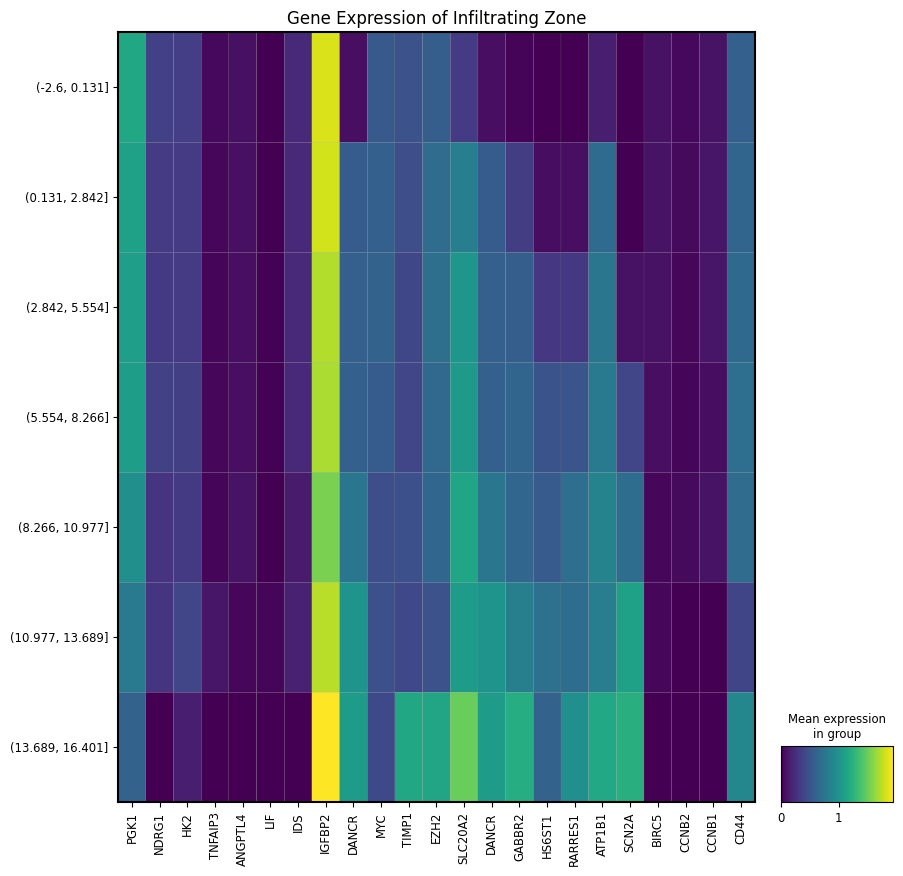

In [524]:
overlapping_keys = set(adata_copy2.obs.columns).intersection(set(adata_copy2.raw.var_names))

# Remove the overlapping columns from adata.obs
adata_copy2.obs = adata_copy2.obs.drop(overlapping_keys, axis=1)

# remove IGFBP2 from total_list

# Plot the heatmap using the adata_copy2 object
sc.pl.matrixplot(adata_copy2, total_list, groupby=['infiltrating_expression'], cmap='viridis', figsize=(10, 10), title="Gene Expression of Infiltrating Zone")
plt.show()